### Analyse home use of robotic device


*import libraries*

In [1]:
import os
import sys
import sqlite3 as sl

import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline

import math
import statistics
import scipy.stats

from functools import reduce
import dataframe_image as dfi
from string import ascii_lowercase
import itertools

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.options.display.max_rows = 500

In [5]:
start_codes=datetime.now()

**import df from sorted time session**

In [6]:
df = pd.read_hdf('./data/P001_df_session.h5','df')
df_targets = pd.read_csv('./data/P001_targets.csv')

In [7]:
df.head()

,index,PatientID,SessionID,GameID,TimeStampDate,TimeStampMS,Sparc,VisualTargetXCoord,VisualTargetYCoord,TargetXCoord,...,ByGain,BxyGain,ByxGain,VelocityX,VelocityY,CurrentSenseLeft,CurrentSenseRight,TotalForce,date_time,TimeStampMS_diff
409,409,001,TTSH-CHISELPuYYoWmBD0SZ54Yz+19suA==,0,2022-03-10 11:13:55,5694266,-1.553095,0.171,0.022,0.32,...,0.0,0.0,0.0,0.069115,-1.256561e-03,-0.0144,-0.0016,0.0,2022-03-10 11:13:55,10560.0
410,410,001,TTSH-CHISELPuYYoWmBD0SZ54Yz+19suA==,0,2022-03-10 11:13:55,5694276,-1.553095,0.171,0.022,0.32,...,0.0,0.0,0.0,0.084195,-1.256943e-03,-0.0464,-0.0016,0.0,2022-03-10 11:13:55,10.0
411,411,001,TTSH-CHISELPuYYoWmBD0SZ54Yz+19suA==,0,2022-03-10 11:13:55,5694286,-1.553095,0.171,0.022,0.32,...,0.0,0.0,0.0,0.099274,1.256562e-03,-0.0464,-0.0016,0.0,2022-03-10 11:13:55,10.0
412,412,001,TTSH-CHISELPuYYoWmBD0SZ54Yz+19suA==,0,2022-03-10 11:13:55,5694296,-1.553095,0.171,0.022,0.32,...,0.0,0.0,0.0,0.118124,3.814697e-07,-0.0464,-0.0016,0.0,2022-03-10 11:13:55,10.0
413,413,001,TTSH-CHISELPuYYoWmBD0SZ54Yz+19suA==,0,2022-03-10 11:13:55,5694306,-1.553095,0.171,0.022,0.32,...,0.0,0.0,0.0,0.138231,-2.512741e-03,-0.0464,-0.0016,0.0,2022-03-10 11:13:55,10.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1441888 entries, 409 to 1457821
Data columns (total 27 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   index               1441888 non-null  int64         
 1   PatientID           1441888 non-null  object        
 2   SessionID           1441888 non-null  object        
 3   GameID              1441888 non-null  int64         
 4   TimeStampDate       1441888 non-null  object        
 5   TimeStampMS         1441888 non-null  int64         
 6   Sparc               1441888 non-null  float64       
 7   VisualTargetXCoord  1441888 non-null  float64       
 8   VisualTargetYCoord  1441888 non-null  float64       
 9   TargetXCoord        1441888 non-null  float64       
 10  TargetYCoord        1441888 non-null  float64       
 11  XCoordinate         1441888 non-null  float64       
 12  YCoordinate         1441888 non-null  float64       
 13  KxGain    

In [9]:
df_targets.head()

,PatientID,CreatedDate,SessionID,Score,Strength,Coordination,Agility,SessionTime,NumberOfTargets
0,TTSH-CHISEL0Pa/Gtc3DUqoPVREp+I/qg==,2022-03-03 02:57:50,TTSH-CHISELuUvzJG4jtU2x7LwcnIDtVA==,321.0,25.078125,42.999474,-1345.362652,10.554035,128
1,TTSH-CHISEL0Pa/Gtc3DUqoPVREp+I/qg==,2022-03-03 03:26:48,TTSH-CHISELATu6AXcc2ECeDZLmfzceLg==,1596.0,49.322033,47.664755,15.144465,19.592974,297
2,TTSH-CHISEL0Pa/Gtc3DUqoPVREp+I/qg==,2022-03-03 09:09:13,TTSH-CHISELfAPnD90VIUqaw/UOUhAk2g==,113.0,40.000000,34.992334,68.233155,1.553366,33
3,TTSH-CHISEL0Pa/Gtc3DUqoPVREp+I/qg==,2022-03-03 09:37:54,TTSH-CHISELPFPihGOPo0a+Me0oGLM1Yw==,181.0,61.428570,35.354460,33.024178,1.496792,33
4,TTSH-CHISEL0Pa/Gtc3DUqoPVREp+I/qg==,2022-03-10 03:17:21,TTSH-CHISELPuYYoWmBD0SZ54Yz+19suA==,161.0,42.500000,36.089092,16.874067,2.595096,38


*patient dictionary*

In [10]:
user_id_dict = {
    'TTSH-CHISELRGgLPwL3Lk6JTgBaVP4bjg==':'Test_01',
    'TTSH-CHISEL2gpumVcbJE267TKKceWbOA==':'NULL', 
    'TTSH-CHISEL0Pa/Gtc3DUqoPVREp+I/qg==':'001', 
    'TTSH-CHISEL9GsWU5zb50CfPyoLNy7qvg==':'002',
    'TTSH-CHISELamITRYYb9UymNH+3xzylgg==':'003', 
    'TTSH-CHISEL6IRO4pIMDUCpIRFbGnO26w==':'004',
    'TTSH-CHISELZSJj4EGZh0iiozqhx3Gf4g==':'005',
    'TTSH-CHISELCn5PqGNyMkKoyFYaOryw5g==':'006'
}; 


*convert date_time*

In [11]:
df['date_time'] = pd.to_datetime(df['TimeStampDate'], format='%Y-%m-%d %H:%M:%S')

*GameID*

In [12]:
game_id_dict = {
    0 : 'Explore the World',
    1 : 'Fishing Game',
    2 : 'Drone Game'
}

In [13]:
# check types of games played
df['GameID'].unique()

array([0, 2, 1], dtype=int64)

In [14]:
# make copy of original df
df1 = df.reset_index()

### EDA

**declare path for saving fig**
<br> path/folder will change later, and declared again later

In [15]:
patientid = df['PatientID'].unique()[0]
if type(patientid) != str:
    patientid = '00' + df['PatientID'].unique()[0].astype(str)
    
main_results_path = os.path.join('data', 'results', patientid)
if not os.path.exists(main_results_path):
    os.makedirs(main_results_path)

*create dataframe*

In [16]:
# updated list_sessions
list_sessions = df1[df1['SessionID'].notna()]['SessionID'].unique()

df_session = []
for session in list_sessions:
    temp = df1[df1['SessionID']==session]  
    df_session.append(temp)

In [18]:
session_nr = []
game_nr = []
start = []
end = []
diff = []
for session, df_list in enumerate(df_session):
    for game in range(0,df1['GameID'].nunique()):
        if game in df_list['GameID'].unique():
            session_nr.append(session)
            game_nr.append(game)
            temp = df_list[df_list['GameID']==game]
            
            start.append(temp[['date_time']].iloc[0][0])
            end.append(temp[['date_time']].iloc[-1][0])
            time_diff = (temp[['date_time']].iloc[-1][0]) - (temp[['date_time']].iloc[0][0])
            diff.append(time_diff/ np.timedelta64(1,'m'))    # in minutes
        

In [19]:
# put in df
time_session = []
for row in range(0,len(session_nr)):
    time_session.append(row)
time_session = pd.DataFrame(time_session,columns=['session_nr'])   
time_session['session_nr'] = session_nr
time_session['game_nr'] = game_nr
time_session['start'] = start
time_session['end'] = end
time_session['diff'] = diff  # in minutes
time_session['just_date'] = time_session['start'].dt.date

In [20]:
time_session

,session_nr,game_nr,start,end,diff,just_date
0,0,0,2022-03-10 11:13:55,2022-03-10 11:17:13,3.300000,2022-03-10
1,1,2,2022-03-10 17:01:34,2022-03-10 17:05:32,3.966667,2022-03-10
2,2,0,2022-03-10 17:06:07,2022-03-10 17:08:09,2.033333,2022-03-10
3,3,0,2022-03-11 12:01:27,2022-03-11 12:11:23,9.933333,2022-03-11
4,4,0,2022-03-11 16:45:13,2022-03-11 16:53:24,8.183333,2022-03-11
5,4,1,2022-03-11 16:57:55,2022-03-11 17:02:56,5.016667,2022-03-11
6,4,2,2022-03-11 17:05:17,2022-03-11 17:10:28,5.183333,2022-03-11
7,5,0,2022-03-11 16:53:24,2022-03-11 16:56:49,3.416667,2022-03-11
8,6,0,2022-03-12 11:17:15,2022-03-12 11:27:31,10.266667,2022-03-12
9,7,1,2022-03-12 11:31:28,2022-03-12 11:41:32,10.066667,2022-03-12


#### number of targets (from different table)

In [23]:
df_targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PatientID        24 non-null     object 
 1   CreatedDate      24 non-null     object 
 2   SessionID        24 non-null     object 
 3   Score            24 non-null     float64
 4   Strength         24 non-null     float64
 5   Coordination     24 non-null     float64
 6   Agility          24 non-null     float64
 7   SessionTime      24 non-null     float64
 8   NumberOfTargets  24 non-null     int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 1.8+ KB


In [24]:
df_targets.replace({'PatientID':user_id_dict},inplace=True)
df_targets['date_time'] = pd.to_datetime(df_targets['CreatedDate'], format='%Y-%m-%d %H:%M:%S')
df_targets['just_date'] = df_targets['date_time'].dt.date

In [25]:
targets_groupsession = df_targets.groupby(['just_date']).sum().reset_index()
targets_groupsession

,just_date,Score,Strength,Coordination,Agility,SessionTime,NumberOfTargets
0,2022-03-03,2211.0,175.828728,161.011024,-1228.960854,33.197168,491
1,2022-03-10,2934.0,173.929615,167.369573,-233.032904,51.714651,654
2,2022-03-11,219.0,20.769230,47.588621,20.684547,10.493445,105
3,2022-03-12,4042.0,175.223047,151.330928,73.707095,61.658001,878
4,2022-03-15,2301.0,158.976776,149.103749,-524.591759,31.536377,467
5,2022-03-17,2476.0,53.779697,49.239704,-814.104143,1346.632446,562
6,2022-03-21,3462.0,150.215042,104.382799,29.691547,51.542343,671
7,2022-03-22,2078.0,70.103806,48.287907,-327.145745,32.187260,409
8,2022-03-23,1949.0,76.688744,48.094645,23.666030,31.400736,402
9,2022-03-24,920.0,352.603004,209.353268,-1823.030661,20.182383,193


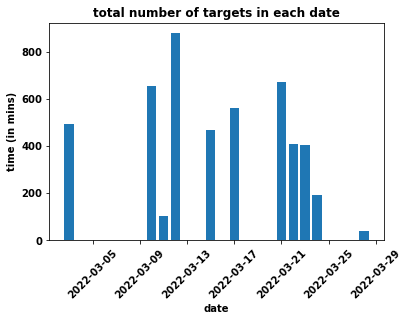

In [26]:
# plot number of targets by date
plt.bar(targets_groupsession['just_date'],targets_groupsession['NumberOfTargets']);
plt.xlabel('date')
plt.xticks(rotation=45)
plt.ylabel('time (in mins)');
plt.title('total number of targets in each date');

plt.savefig(main_results_path + '\\total_targets_session.png',bbox_inches = "tight")
plt.show();

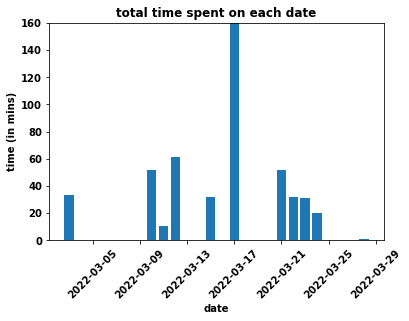

In [27]:
# plot number of targets by date
plt.bar(targets_groupsession['just_date'],targets_groupsession['SessionTime']);
plt.xlabel('date')
plt.xticks(rotation=45)
plt.ylabel('time (in mins)');
plt.ylim(top=160)
plt.title('total time spent on each date');

plt.savefig(main_results_path + '\\total_time_date_targetsdf.png',bbox_inches = "tight")
plt.show();

#### time duration


##### time spend per session

In [28]:
time_groupsession = time_session.groupby(['just_date']).sum().reset_index()
time_groupsession.drop(columns=['session_nr','game_nr'])

,just_date,diff
0,2022-03-10,9.300000
1,2022-03-11,31.733333
2,2022-03-12,61.066667
3,2022-03-15,30.516667
4,2022-03-16,10.033333
5,2022-03-17,37.716667
6,2022-03-21,50.600000
7,2022-03-22,31.866667
8,2022-03-23,31.083333
9,2022-03-24,21.466667


**number of active days playing**

In [29]:
active_days = time_groupsession['just_date'].count()
print(f'total number of days played = {active_days} days')

total number of days played = 11 days


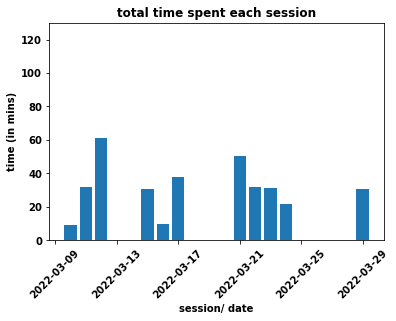

In [30]:
# plot number of games by session
plt.bar(time_groupsession['just_date'],time_groupsession['diff']);
plt.xlabel('session/ date')
plt.xticks(rotation=45)
plt.ylabel('time (in mins)');
plt.ylim(top=130)
plt.title('total time spent each session');

plt.savefig(main_results_path + '\\total_time_session.png',bbox_inches = "tight")
plt.show();

##### total time spent on play

In [31]:
total_time = time_session[['diff']].sum()
print(f'total time spent = {total_time[0]:.2f} mins')

total time spent = 346.33 mins


In [32]:
days = math.floor(total_time[0] / (24*60))
leftover_minutes = total_time[0] % (24*60)

hours = math.floor(leftover_minutes / 60)
mins = total_time[0] - (days*1440) - (hours*60)

print(f'total time spent = {days} days, {hours:.2f} hours, {mins:.2f} mins')

total time spent = 0 days, 5.00 hours, 46.33 mins


##### time spend by game

In [33]:
time_gamesession = time_session.groupby(['game_nr']).sum().reset_index()
time_gamesession.index = time_gamesession.index.map(game_id_dict)
time_gamesession.drop(columns=['session_nr'])

,game_nr,diff
Explore the World,0,139.533333
Fishing Game,1,101.383333
Drone Game,2,105.416667


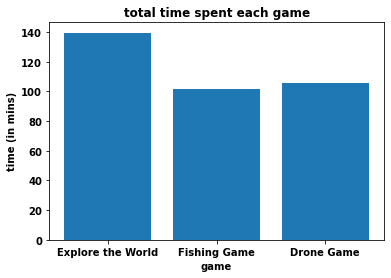

In [34]:
# plot number of games by session
plt.bar(time_gamesession.index,time_gamesession['diff']);
plt.xlabel('game')
plt.ylabel('time (in mins)');
plt.title('total time spent each game');

plt.savefig(main_results_path + '\\total_time_game.png',bbox_inches = "tight")
plt.show();

##### time lapsed between sessions

In [35]:
time_session['lapsed_time'] = np.nan
for nr in range(0,len(time_session)-1):
    time_session = time_session.sort_values('start')
    time_session['lapsed_time'].iloc[nr+1] = time_session.iloc[nr+1]['end'] - time_session.iloc[nr]['start']
ave_lapsed_time = time_session[['lapsed_time']].dropna().sum() / len(time_session[['lapsed_time']])

lapsed_days = ave_lapsed_time.dt.days[0]
lapsed_hours, remainder = divmod(ave_lapsed_time.dt.seconds[0], 3600)
lapsed_minutes, lapsed_seconds = divmod(remainder, 60)
print(f'average lapsed time between sessions = {lapsed_days} days, {lapsed_hours:.2f} hours, {lapsed_minutes:.2f} mins')

average lapsed time between sessions = 0 days, 11.00 hours, 38.00 mins


##### session dates by game

In [36]:
date_game0 = time_session[time_session['game_nr']==0].groupby(['just_date']).sum().reset_index()
date_game0.drop(columns=['session_nr','game_nr'])

,just_date,diff
0,2022-03-10,5.333333
1,2022-03-11,21.533333
2,2022-03-12,20.583333
3,2022-03-15,10.216667
4,2022-03-16,10.033333
5,2022-03-17,17.533333
6,2022-03-21,13.566667
7,2022-03-22,10.366667
8,2022-03-23,10.150000
9,2022-03-24,9.750000


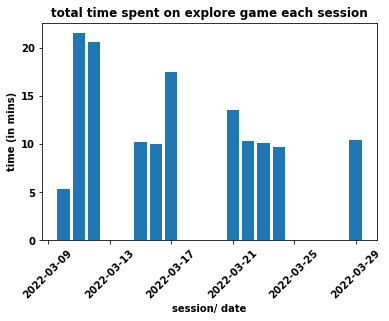

In [37]:
# plot explore game play by session
plt.bar(date_game0['just_date'],date_game0['diff']);
plt.xlabel('session/ date')
plt.xticks(rotation=45)
plt.ylabel('time (in mins)');
plt.title('total time spent on explore game each session');

plt.savefig(main_results_path + '\\total_time_explore.png',bbox_inches = "tight")
plt.show();

In [38]:
date_game1 = time_session[time_session['game_nr']==1].groupby(['just_date']).sum().reset_index()
date_game1.drop(columns=['session_nr','game_nr'])

,just_date,diff
0,2022-03-11,5.016667
1,2022-03-12,20.216667
2,2022-03-15,10.050000
3,2022-03-17,10.116667
4,2022-03-21,17.433333
5,2022-03-22,11.316667
6,2022-03-23,10.366667
7,2022-03-24,6.583333
8,2022-03-29,10.283333


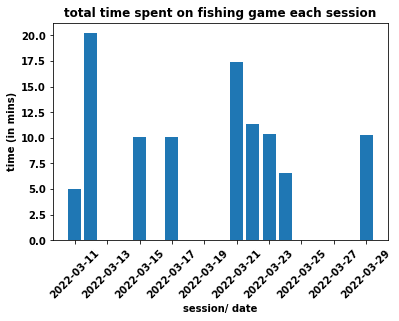

In [39]:
# plot explore game play by session
plt.bar(date_game1['just_date'],date_game1['diff']);
plt.xlabel('session/ date')
plt.xticks(rotation=45)
plt.ylabel('time (in mins)');
plt.title('total time spent on fishing game each session');

plt.savefig(main_results_path + '\\total_time_fish.png',bbox_inches = "tight")
plt.show();

In [40]:
date_game2 = time_session[time_session['game_nr']==2].groupby(['just_date']).sum().reset_index()
date_game2.drop(columns=['session_nr','game_nr'])

,just_date,diff
0,2022-03-10,3.966667
1,2022-03-11,5.183333
2,2022-03-12,20.266667
3,2022-03-15,10.250000
4,2022-03-17,10.066667
5,2022-03-21,19.600000
6,2022-03-22,10.183333
7,2022-03-23,10.566667
8,2022-03-24,5.133333
9,2022-03-29,10.200000


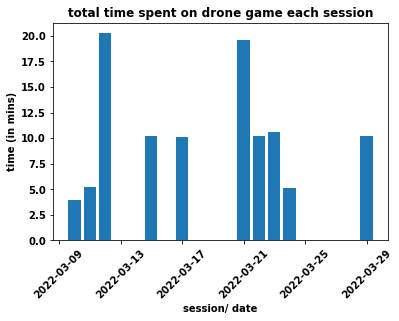

In [41]:
# plot explore game play by session
plt.bar(date_game2['just_date'],date_game2['diff']);
plt.xlabel('session/ date')
plt.xticks(rotation=45)
plt.ylabel('time (in mins)');
plt.title('total time spent on drone game each session');

plt.savefig(main_results_path + '\\total_time_drone.png',bbox_inches = "tight")
plt.show();

**plot all games by session**

In [42]:
dfs = reduce(lambda x,y: pd.merge(x,y, on='just_date', how='outer'), [date_game0, date_game1, date_game2]).fillna(0)
dfs.drop(columns=['session_nr_x','session_nr_y','session_nr','game_nr_x','game_nr_y','game_nr'],inplace=True)

In [43]:
dfs.rename(columns={'diff_x': 'explore',
                    'diff_y': 'fish',
                   'diff': 'drone'}, inplace=True)
dfs = dfs.set_index(['just_date'])

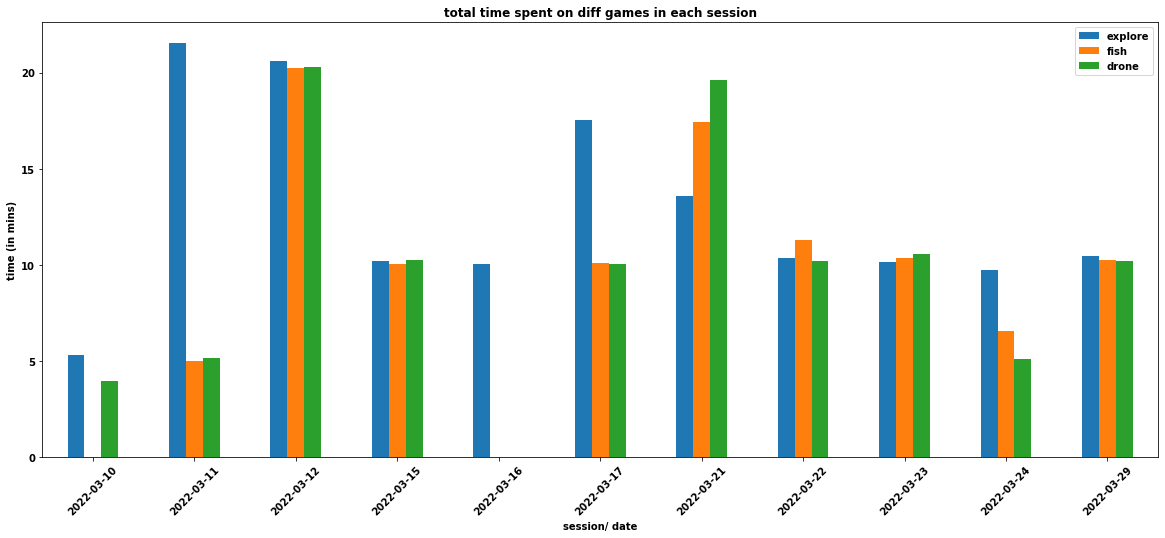

In [44]:
dfs.plot.bar(figsize=(20,8))
plt.xlabel('session/ date')
plt.xticks(rotation=45)
plt.ylabel('time (in mins)');
plt.title('total time spent on diff games in each session');

plt.savefig(main_results_path + '\\total_time_game_separate.png',bbox_inches = "tight")
plt.show();

##### number of times each game was played

In [45]:
time_gamecount = time_session.groupby(['game_nr']).count().reset_index()
time_gamecount.index = time_gamecount.index.map(game_id_dict)
time_gamecount.drop(columns=['session_nr','end','diff','just_date'])

,game_nr,start,lapsed_time
Explore the World,0,17,16
Fishing Game,1,11,11
Drone Game,2,12,12


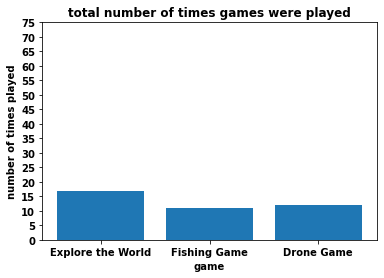

In [46]:
# plot number of games by session
plt.bar(time_gamecount.index,time_gamecount['session_nr']);
plt.xlabel('game')
plt.ylabel('number of times played');
plt.ylim(top=75)
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(5))
plt.title('total number of times games were played');

plt.savefig(main_results_path + '\\times_played_game.png',bbox_inches = "tight")
plt.show();

**save outputs to txt file**

In [47]:
with open(main_results_path + '\\outputs.txt', mode='w') as file_:
    file_.write(f'total number of days played = {active_days} days')
    file_.write("\n")  # Next line.
    file_.write(f'total time spent = {total_time[0]:.2f} mins')
    file_.write("\n")  
    file_.write(f'total time spent = {days} days, {hours:.2f} hours, {mins:.2f} mins')
    file_.write("\n")  
    file_.write(f'average lapsed time between sessions = {lapsed_days} days, {lapsed_hours:.2f} hours, {lapsed_minutes:.2f} mins')
    file_.write("\n")  

#### Mean/std of Sparc, Total force, velocity

In [48]:
session_nr = []
game_nr = []
sparc_mean =[]
sparc_std =[]
Ftot_mean = []
Ftot_std = []
vel_mean = []
veldb_mean = []
veldb_std = []
vel_diff = []

for session, df in enumerate(df_session):
    for game in range(0,df1['GameID'].nunique()):
        if game in df['GameID'].unique():
            df_game = df[df['GameID']==game]
            session_nr.append(session)
            game_nr.append(game)
            sparc_mean.append(df_game[['Sparc']].mean().values[0])
            sparc_std.append(df_game[['Sparc']].std().values[0])
            Ftot_mean.append(df_game[['TotalForce']].mean().values[0])
            Ftot_std.append(df_game[['TotalForce']].std().values[0])
            
            # vel from coord 
            # note coord in m
            df_game[['TimeStampMS_diff','x_diff','y_diff']]=df_game[['TimeStampMS','XCoordinate','YCoordinate']].diff()
            df_game['step_size'] = np.sqrt(df_game['x_diff']**2+df_game['y_diff']**2)
            # vel in m/sec
            vel_mean.append((df_game['step_size'].sum())/(df_game['TimeStampMS_diff'].sum()/1000))
            
            # vel from velX and velY from db?
            df_game['vel_db'] = np.sqrt(df_game['VelocityX']**2+df_game['VelocityY']**2)
            veldb_mean.append(df_game[['vel_db']].mean().values[0])
            veldb_std.append(df_game[['vel_db']].std().values[0])
            
            # vel difference within session
            vel_diff.append((np.array_split(df_game['vel_db'],4)[3].mean()) - (np.array_split(df_game['vel_db'],4)[0].mean()))


In [49]:
# put in df
gen_parameters = []
for row in range(0,len(session_nr)):
    gen_parameters.append(row)
gen_parameters = pd.DataFrame(gen_parameters,columns=['session_nr'])   
gen_parameters['session_nr'] = session_nr
gen_parameters['game_nr'] = game_nr
gen_parameters['sparc_mean'] = sparc_mean
gen_parameters['sparc_std'] = sparc_std
gen_parameters['Ftot_mean'] = Ftot_mean
gen_parameters['Ftot_std'] = Ftot_std
gen_parameters['vel_mean'] = vel_mean
gen_parameters['veldb_mean'] = veldb_mean
gen_parameters['veldb_std'] = veldb_std
gen_parameters['vel_diff'] = vel_diff

##### Plot mean Sparc

In [51]:
gen_explore = gen_parameters[gen_parameters['game_nr']==0]
gen_fish = gen_parameters[gen_parameters['game_nr']==1]
gen_drone = gen_parameters[gen_parameters['game_nr']==2]

**explore game**

In [53]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 15,
        }

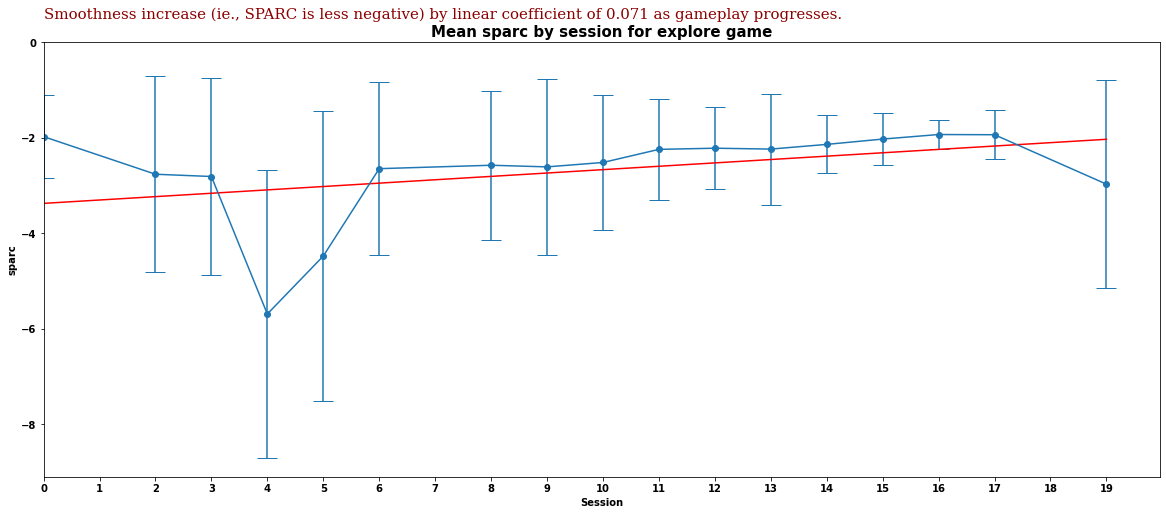

In [54]:
plt.figure(figsize=(20,8))
plt.errorbar(gen_explore['session_nr'],gen_explore['sparc_mean'],gen_explore['sparc_std'], marker='o', capsize=10)
plt.xlim(left=0);
plt.xlabel('Session')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.ylim(top=0)

# plot trendline (just a linear fitting)
z = np.polyfit(gen_explore['session_nr'],gen_explore['sparc_mean'], 1)
p = np.poly1d(z)
plt.plot(gen_explore['session_nr'],p(gen_explore['session_nr']),'r-')
# print('y=%.6fx+(%.6f)'%(z[0],z[1]))

if z[0] > 0:
    plt.text(0,0.5,f'Smoothness increase (ie., SPARC is less negative) by linear coefficient of {z[0]:.3f} as gameplay progresses.',fontdict=font)
else:
    plt.text(0,0.5,f'Decrease in smoothness (ie., SPARC is more negative) by linear coefficient of {z[0]:.3f} as gameplay progresses.',fontdict=font)

plt.ylabel('sparc')

plt.title('Mean sparc by session for explore game',fontsize=15)

plt.savefig(main_results_path + '\\sparc_explore.png',bbox_inches = "tight")
plt.show();

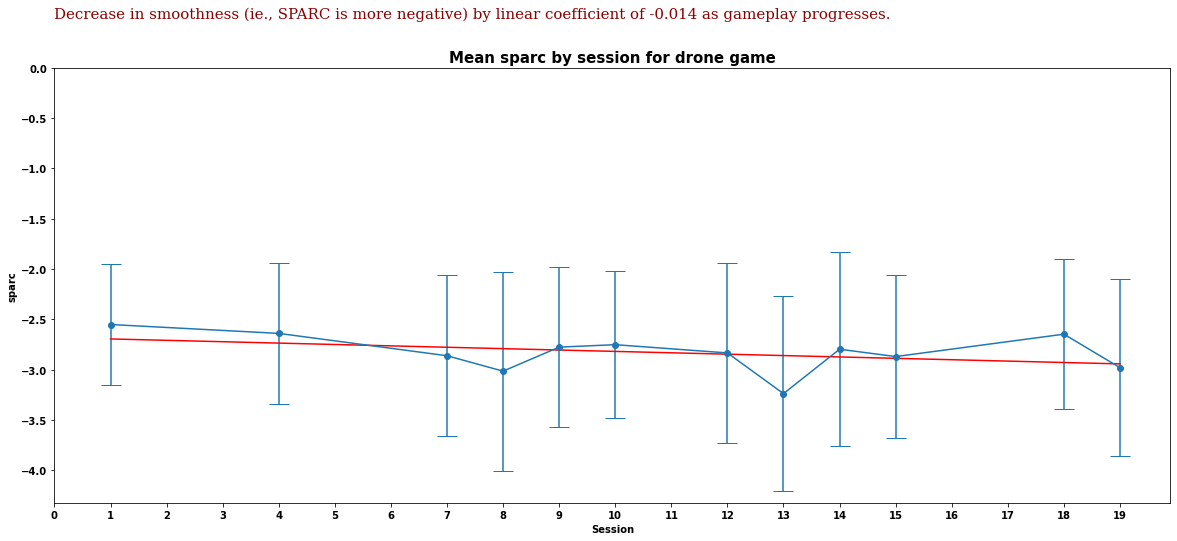

In [55]:
plt.figure(figsize=(20,8))
plt.errorbar(gen_drone['session_nr'],gen_drone['sparc_mean'],gen_drone['sparc_std'], marker='o', capsize=10)
plt.xlim(left=0);
plt.xlabel('Session')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.ylim(top=0)

# plot trendline (just a linear fitting)
z = np.polyfit(gen_drone['session_nr'],gen_drone['sparc_mean'], 1)
p = np.poly1d(z)
plt.plot(gen_drone['session_nr'],p(gen_drone['session_nr']),'r-')

if z[0] > 0:
    plt.text(0,0.5,f'Smoothness increase (ie., SPARC is less negative) by linear coefficient of {z[0]:.3f} as gameplay progresses.',fontdict=font)
else:
    plt.text(0,0.5,f'Decrease in smoothness (ie., SPARC is more negative) by linear coefficient of {z[0]:.3f} as gameplay progresses.',fontdict=font)

plt.ylabel('sparc')
plt.title('Mean sparc by session for drone game',fontsize=15)

plt.savefig(main_results_path + '\\sparc_drone.png',bbox_inches = "tight")
plt.show();

##### Plot mean total force
only for explore game

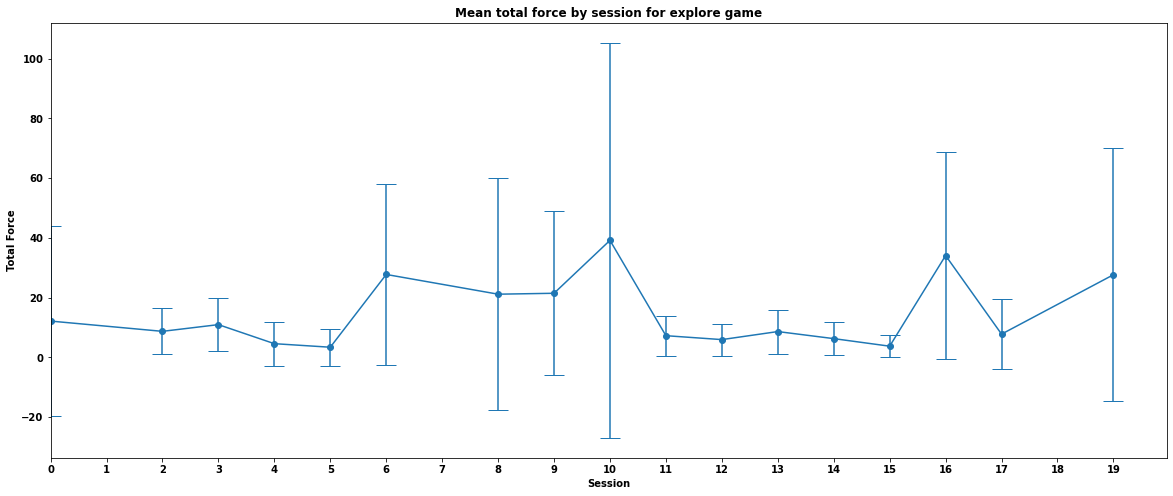

In [56]:
plt.figure(figsize=(20,8))
plt.errorbar(gen_explore['session_nr'],gen_explore['Ftot_mean'],gen_explore['Ftot_std'], marker='o', capsize=10)
plt.xlim(left=0);
plt.xlabel('Session')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.ylabel('Total Force')
plt.title('Mean total force by session for explore game')

plt.savefig(main_results_path + '\\Ftotal_explore.png',bbox_inches = "tight")
plt.show();

##### Plot mean velocity (by session)

In [57]:
ex = gen_explore['vel_mean'].mean()
fish = gen_fish['vel_mean'].mean()
dr = gen_drone['vel_mean'].mean()
mean_vel_max=max([ex,fish,dr])

vel_max = gen_parameters['vel_mean'].max()

if ex==mean_vel_max:
    max_vel_game='explore'
elif fish==mean_vel_max:
    max_vel_game='fish'
elif dr==mean_vel_max:
    max_vel_game='drone'
    
print(f'Max mean velocity of {vel_max:.3f} m/s occurred during {max_vel_game} game')

Max mean velocity of 0.079 m/s occurred during fish game


In [58]:
# save to outputs file
with open(main_results_path + '\\outputs.txt', mode='a') as file_:
    file_.write(f'Max mean velocity of {vel_max:.3f} m/s occurred during {max_vel_game} game')
    file_.write("\n")  # Next line.

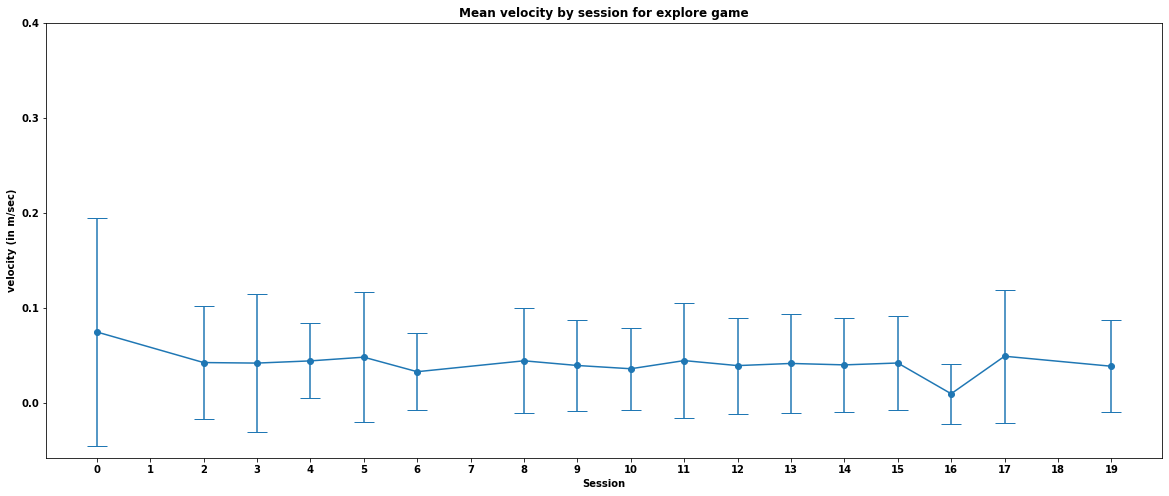

In [59]:
plt.figure(figsize=(20,8))
plt.errorbar(gen_explore['session_nr'],gen_explore['veldb_mean'],gen_explore['veldb_std'], marker='o', capsize=10);
plt.xlabel('Session')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.ylabel('velocity (in m/sec)')
plt.ylim(top=0.4)
plt.title('Mean velocity by session for explore game');

plt.savefig(main_results_path + '\\Mean_vel_explore.png',bbox_inches = "tight")
plt.show();

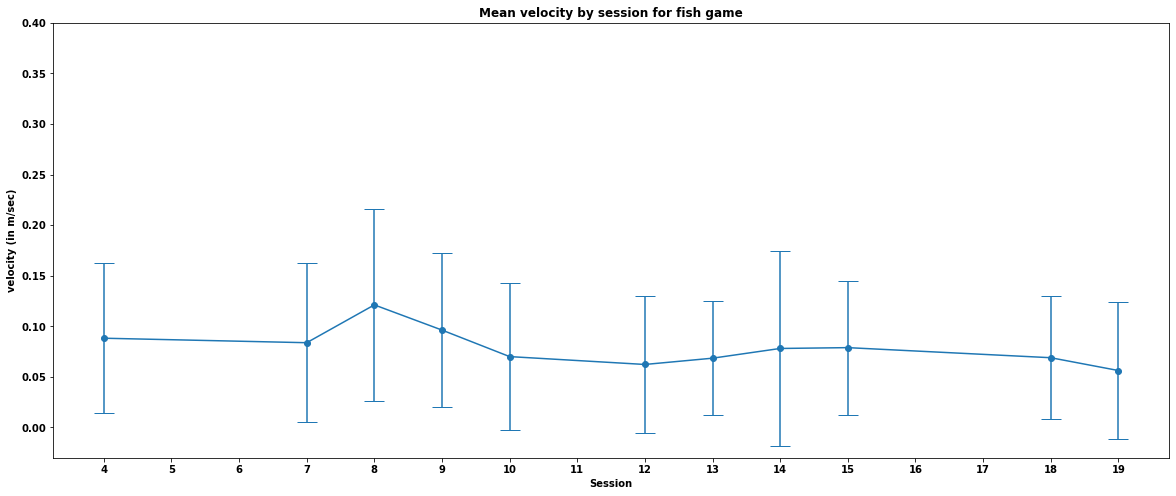

In [60]:
plt.figure(figsize=(20,8))
plt.errorbar(gen_fish['session_nr'],gen_fish['veldb_mean'],gen_fish['veldb_std'], marker='o', capsize=10);

plt.xlabel('Session')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.ylabel('velocity (in m/sec)')
plt.ylim(top=0.4)
plt.title('Mean velocity by session for fish game')

plt.savefig(main_results_path + '\\Mean_vel_fish.png',bbox_inches = "tight")
plt.show();

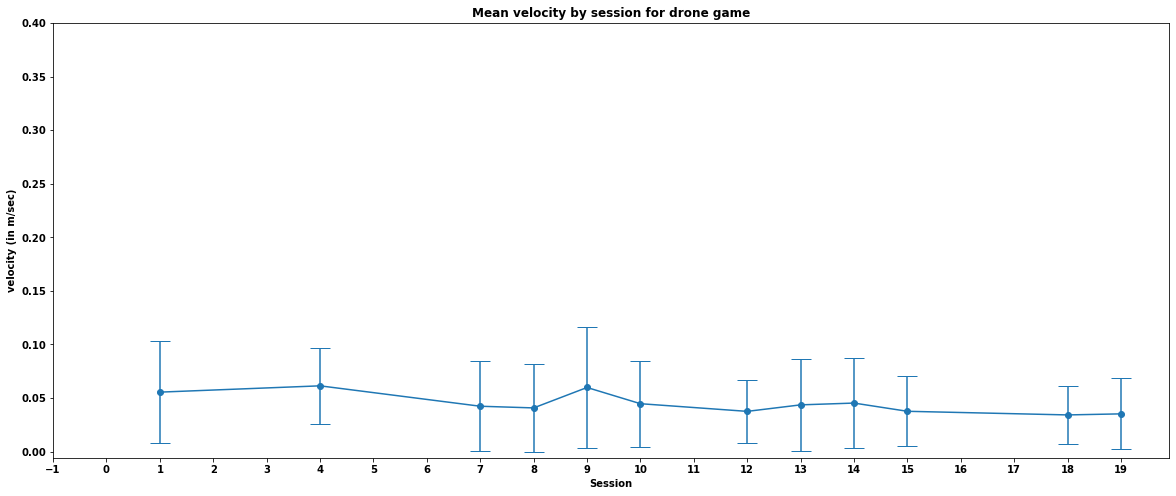

In [61]:
plt.figure(figsize=(20,8))
plt.errorbar(gen_drone['session_nr'],gen_drone['veldb_mean'],gen_drone['veldb_std'], marker='o', capsize=10);

plt.xlabel('Session')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.xlim(left=-1)
plt.ylabel('velocity (in m/sec)')
plt.ylim(top=0.4)
plt.title('Mean velocity by session for drone game')

plt.savefig(main_results_path + '\\Mean_vel_drone.png',bbox_inches = "tight")
plt.show();

##### Plot change in velocity (within session) by session

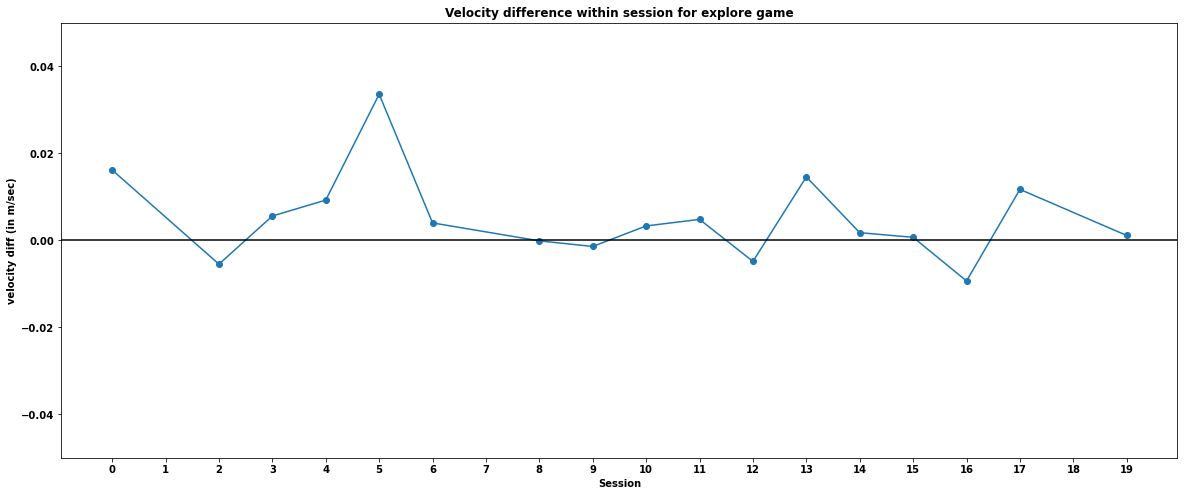

In [65]:
plt.figure(figsize=(20,8))
plt.plot(gen_explore['session_nr'],gen_explore['vel_diff'], marker='o');
plt.xlabel('Session')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.axhline(y=0, color='black',linestyle='-')
plt.ylabel('velocity diff (in m/sec)')
plt.ylim([-0.05,0.05])
plt.title('Velocity difference within session for explore game');

plt.savefig(main_results_path + '\\Vel_diff_explore.png',bbox_inches = "tight")
plt.show();

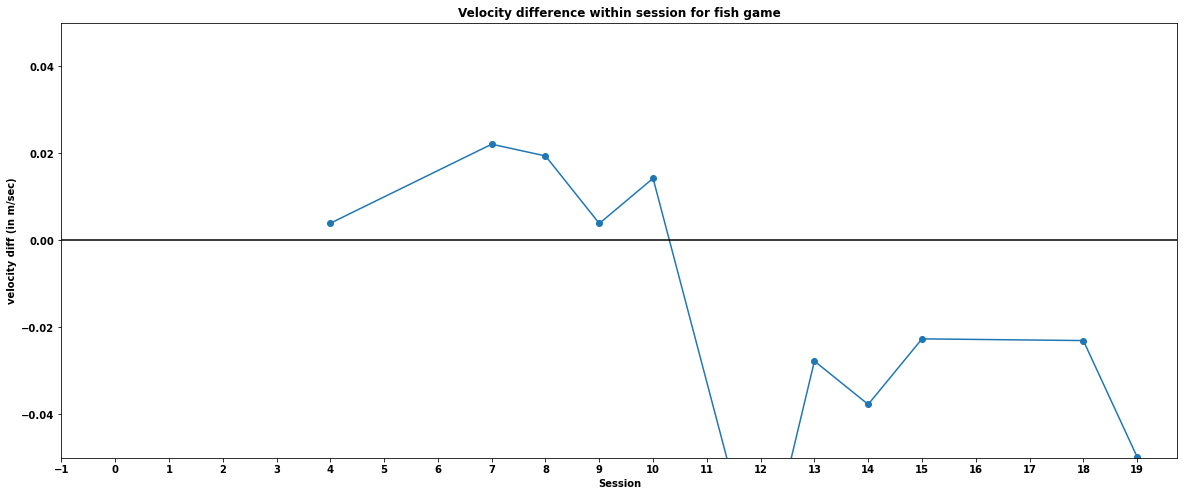

In [66]:
plt.figure(figsize=(20,8))
plt.plot(gen_fish['session_nr'],gen_fish['vel_diff'],marker='o');

plt.xlabel('Session')
plt.xlim(left=-1)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.axhline(y=0, color='black',linestyle='-')
plt.ylabel('velocity diff (in m/sec)')
plt.ylim([-0.05,0.05])
plt.title('Velocity difference within session for fish game');

plt.savefig(main_results_path + '\\Vel_diff_fish.png',bbox_inches = "tight")
plt.show();

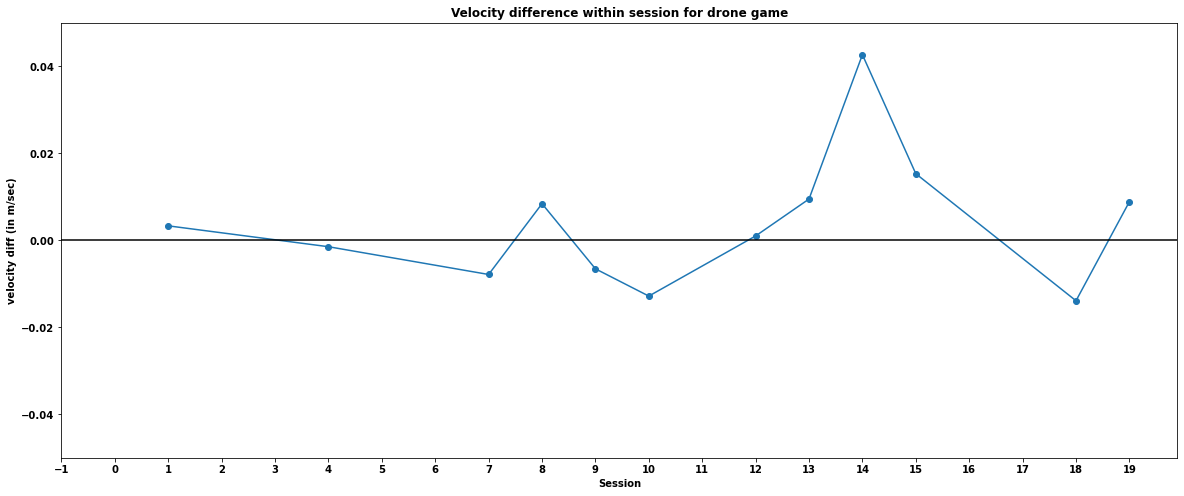

In [67]:
plt.figure(figsize=(20,8))
plt.plot(gen_drone['session_nr'],gen_drone['vel_diff'],marker='o');

plt.xlabel('Session')
plt.xlim(left=-1)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.axhline(y=0, color='black',linestyle='-')
plt.ylabel('velocity diff (in m/sec)')
plt.ylim([-0.05,0.05])
plt.title('Velocity difference within session for drone game');

plt.savefig(main_results_path + '\\Vel_diff_drone.png',bbox_inches = "tight")
plt.show();


#### Smoothness (Sparc)
only for explore[GameID=0] and drone[GameID=2] games
<br> Does SPARC stabilize as gameplay progresses?


**WILL DECIDE HOW TO RE-PLOT THIS**

In [69]:
# # def run_sessions(df_session):
# plt.figure(figsize=(20,10))
# labels=[]
# for session, df in enumerate(df_session):
#     # only plot for explore game
#     game=0
#     if game in df['GameID'].unique():
#         df_game = df[df['GameID']==0]
#         df_game['tsec'] = df_game[['TimeStampMS']].diff().cumsum(axis=0)/1000

#         plt.step(df_game['tsec'],df_game['Sparc']);
#         labels.append(r'Session{}'.format(session))
        
#     plt.xlim([0,1200])
#     plt.legend(labels, bbox_to_anchor=(1.1,1), loc='upper right')
#     plt.xlabel('time/ in sec',fontsize=12)
#     plt.ylabel('sparc',fontsize=12)
#     plt.title('sparc in explore game',fontsize=15);

In [70]:
# plt.figure(figsize=(20,10))
# labels=[]
# for session, df in enumerate(df_session):
#     # only plot for explore game
#     game=2
#     if game in df['GameID'].unique():
#         df_game = df[df['GameID']==2]
#         df_game['tsec'] = df_game[['TimeStampMS']].diff().cumsum(axis=0)/1000

#         plt.step(df_game['tsec'],df_game['Sparc']);
#         labels.append(r'Session{}'.format(session))

#     plt.xlim([0,700])
#     plt.legend(labels, bbox_to_anchor=(1.1,1), loc='upper right')
#     plt.xlabel('time/ in sec',fontsize=12)
#     plt.ylabel('sparc',fontsize=12)
#     plt.title('sparc in drone game',fontsize=15);

#### Fish game analysis

In [71]:
def plot_fish_analysis(game):
    '''function to plot velocity and direct distance (between basket and fish caught), defined by targets'''
    fig = plt.figure(figsize=(20,15))
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)

    ax1.plot(repeats.index,repeats['velocity'],marker='o',color='red',label='velocity');
    ax1.set_xlim(left=0);
    ax1.set_ylim(bottom=0);
    ax1.set_ylabel('velocity/ in m/s')

    ax1.legend(loc='upper right')
    ax1.set_title('velocity');

    ax2.plot(repeats.index,repeats['reach'],marker='o',color='blue',label='distance');
    ax2.set_xlim(left=0);
    ax2.set_ylim(bottom=0);
    ax2.set_ylabel('distance/ m')
    ax2.legend(loc='upper right')
    ax2.set_title('direct distance');

    plt.suptitle('Player = {}, Plot velocity and direct distance in each target: Session nr={}, Game=fish'.format(patientid, session),fontsize=15)
    plt.xlabel('targets',fontsize=12);

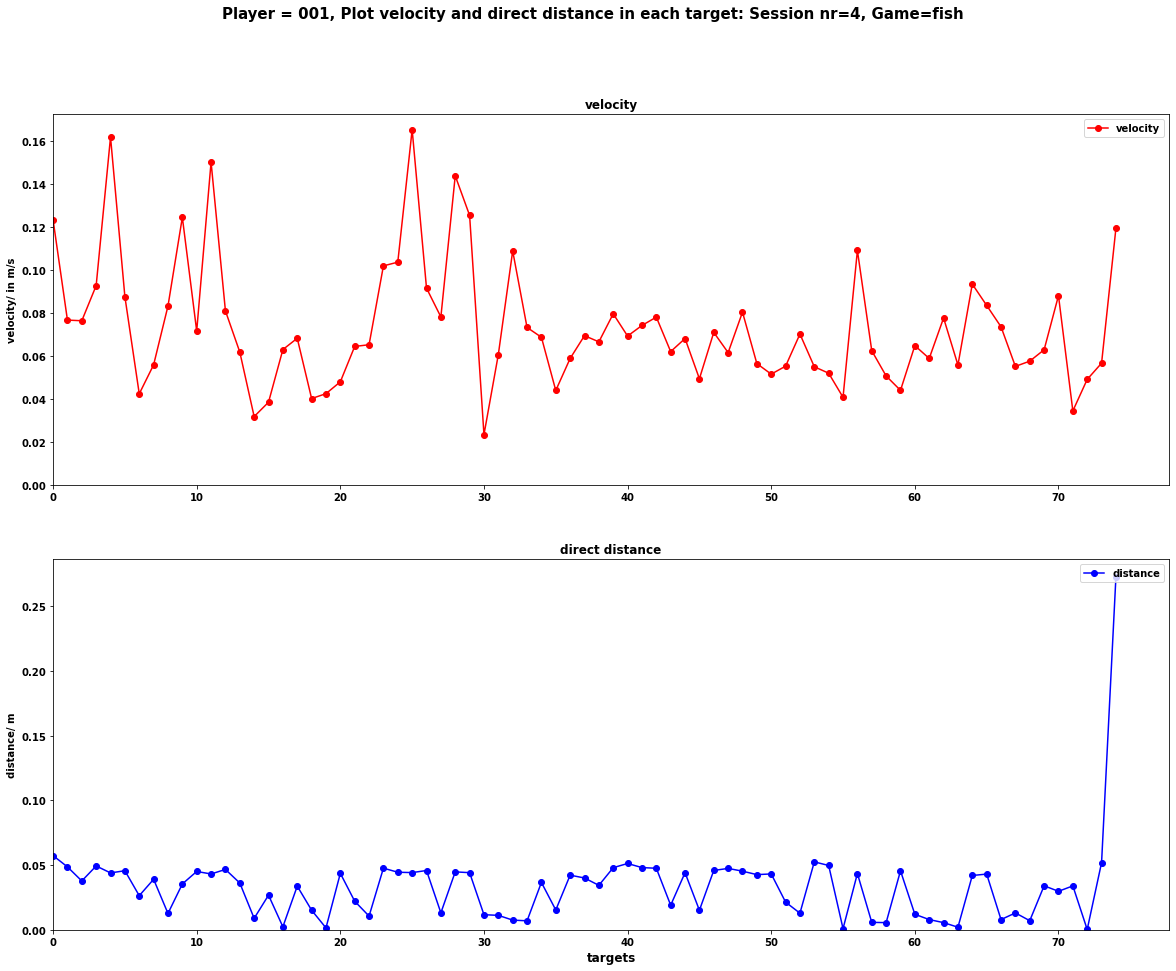

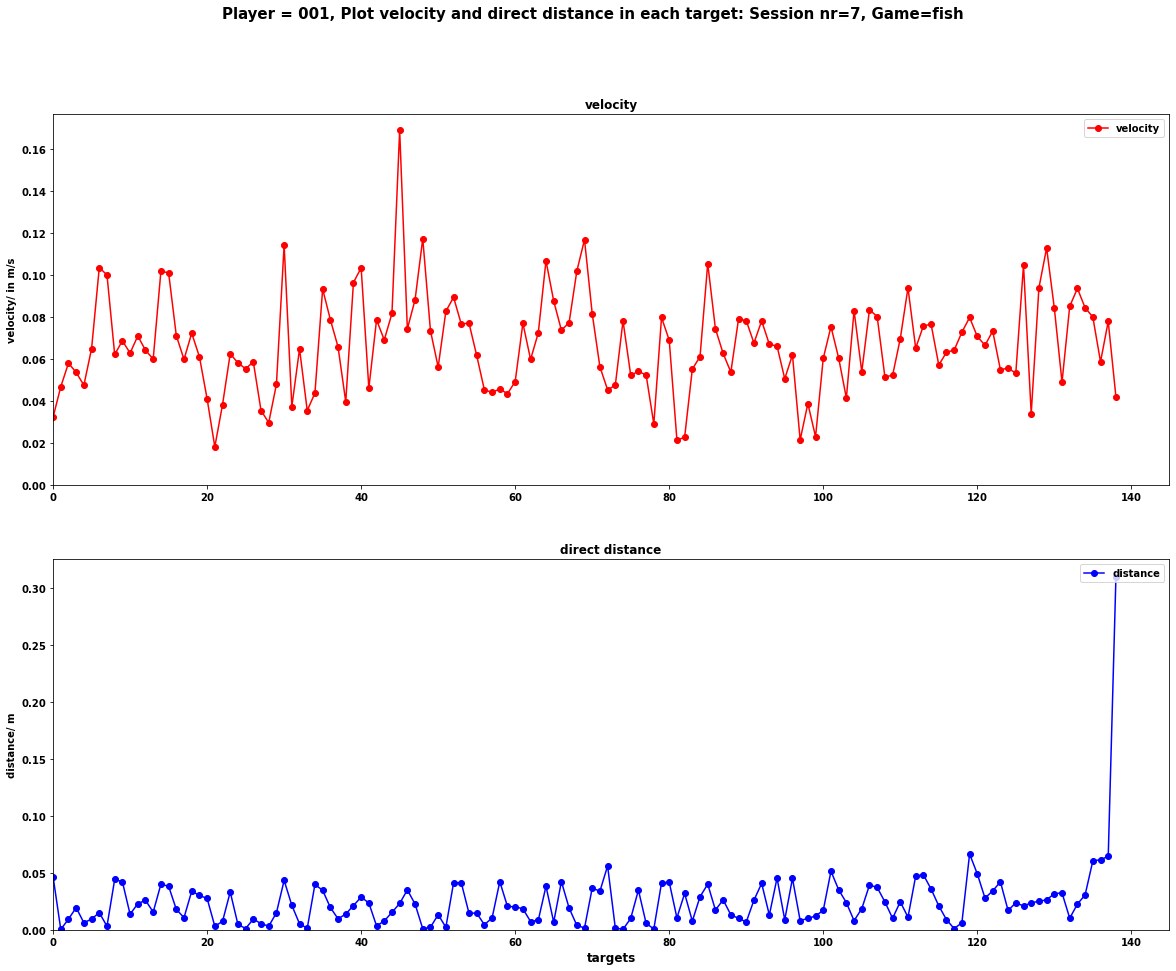

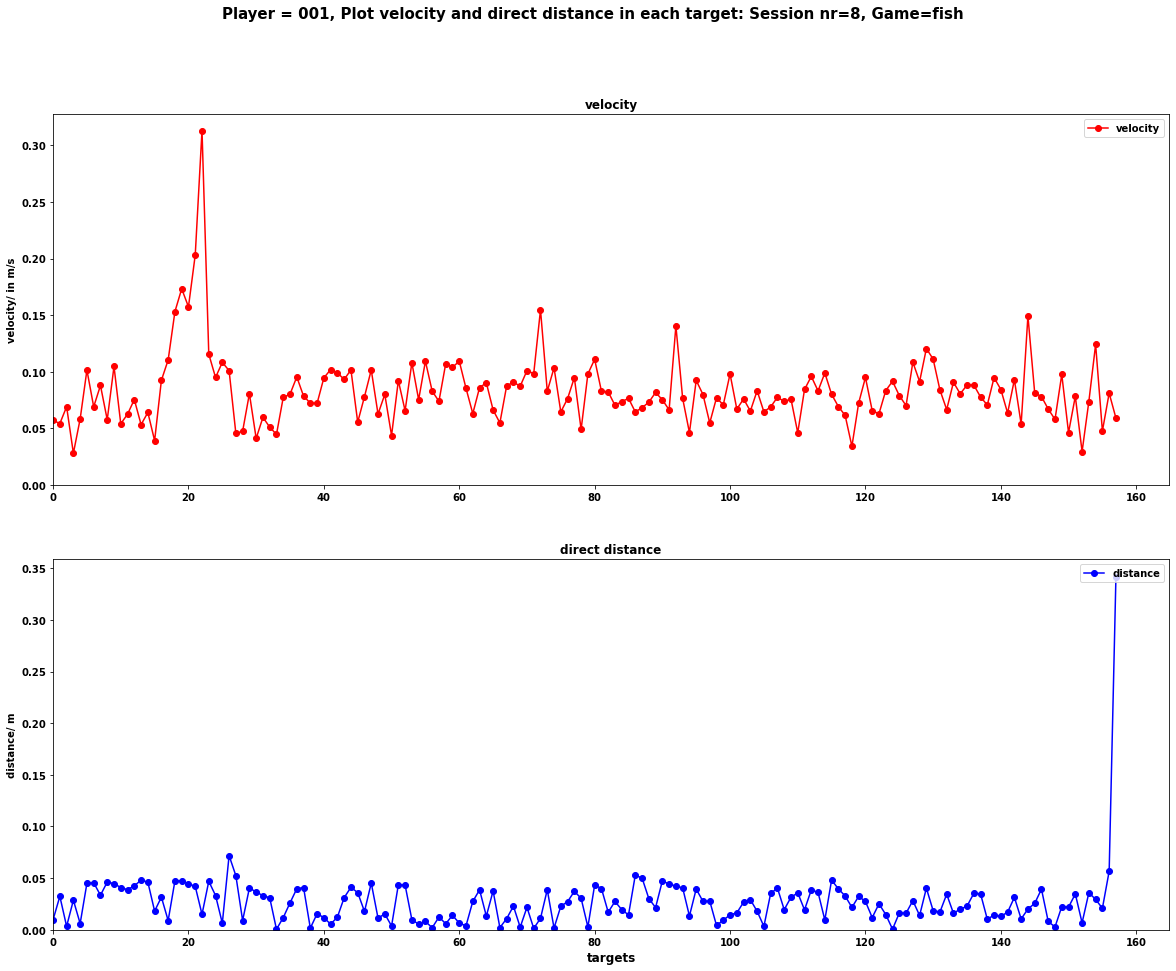

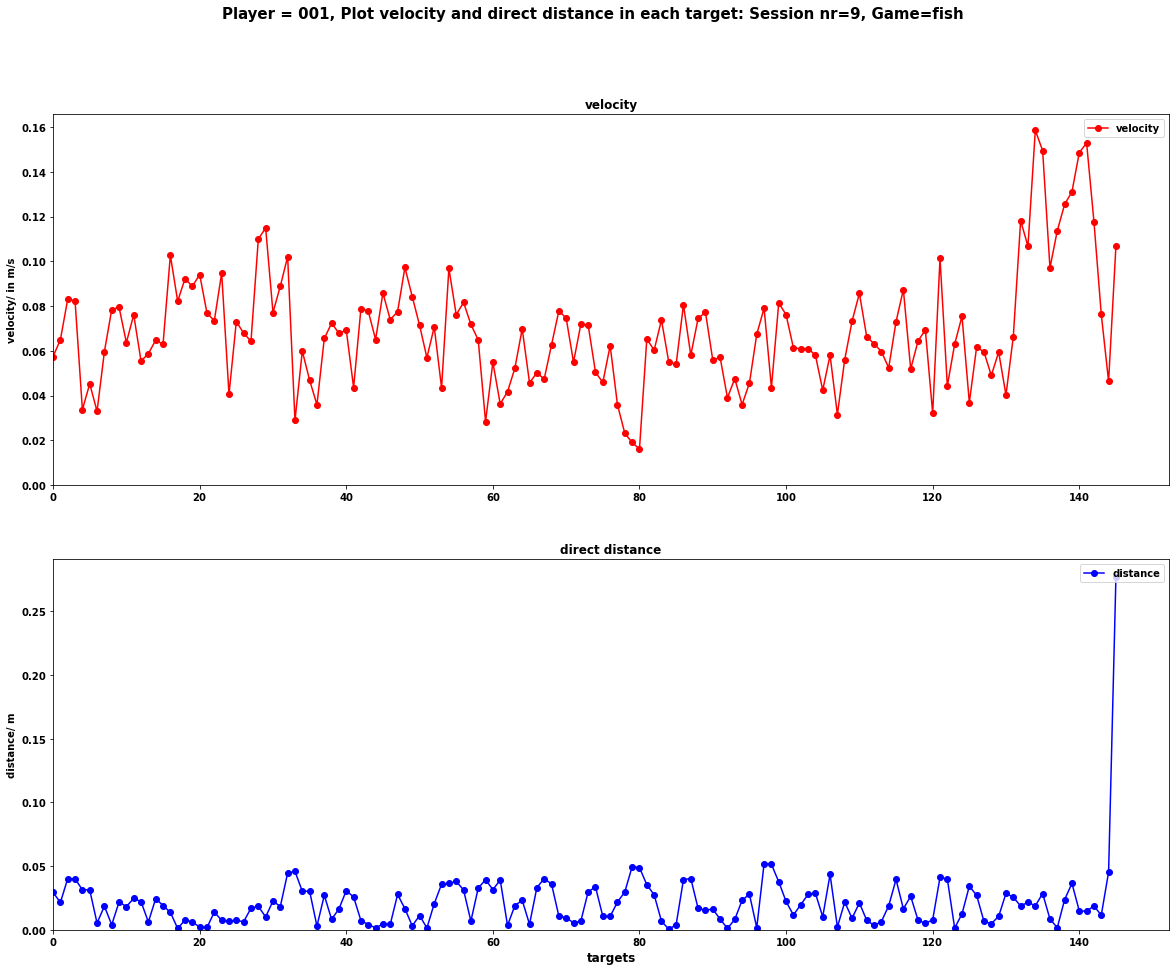

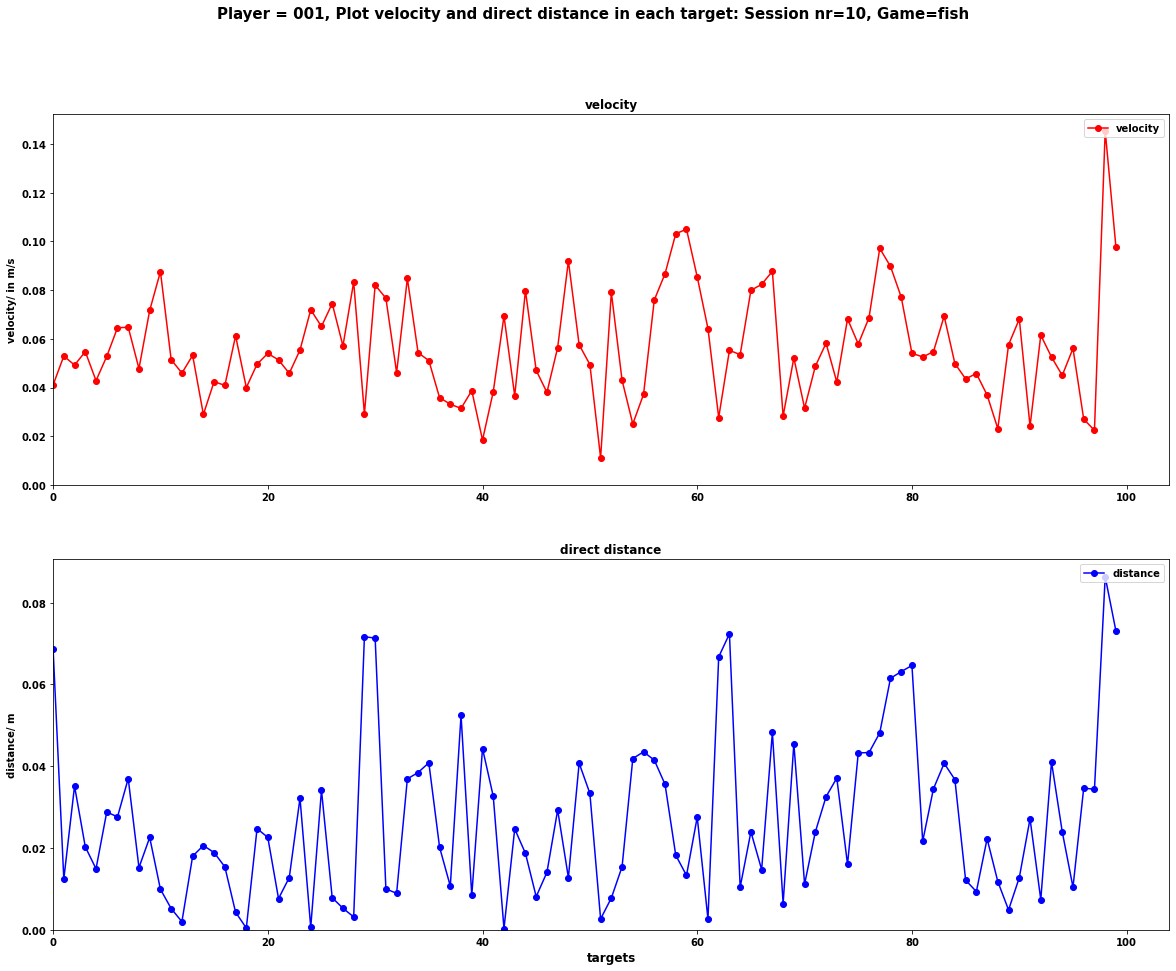

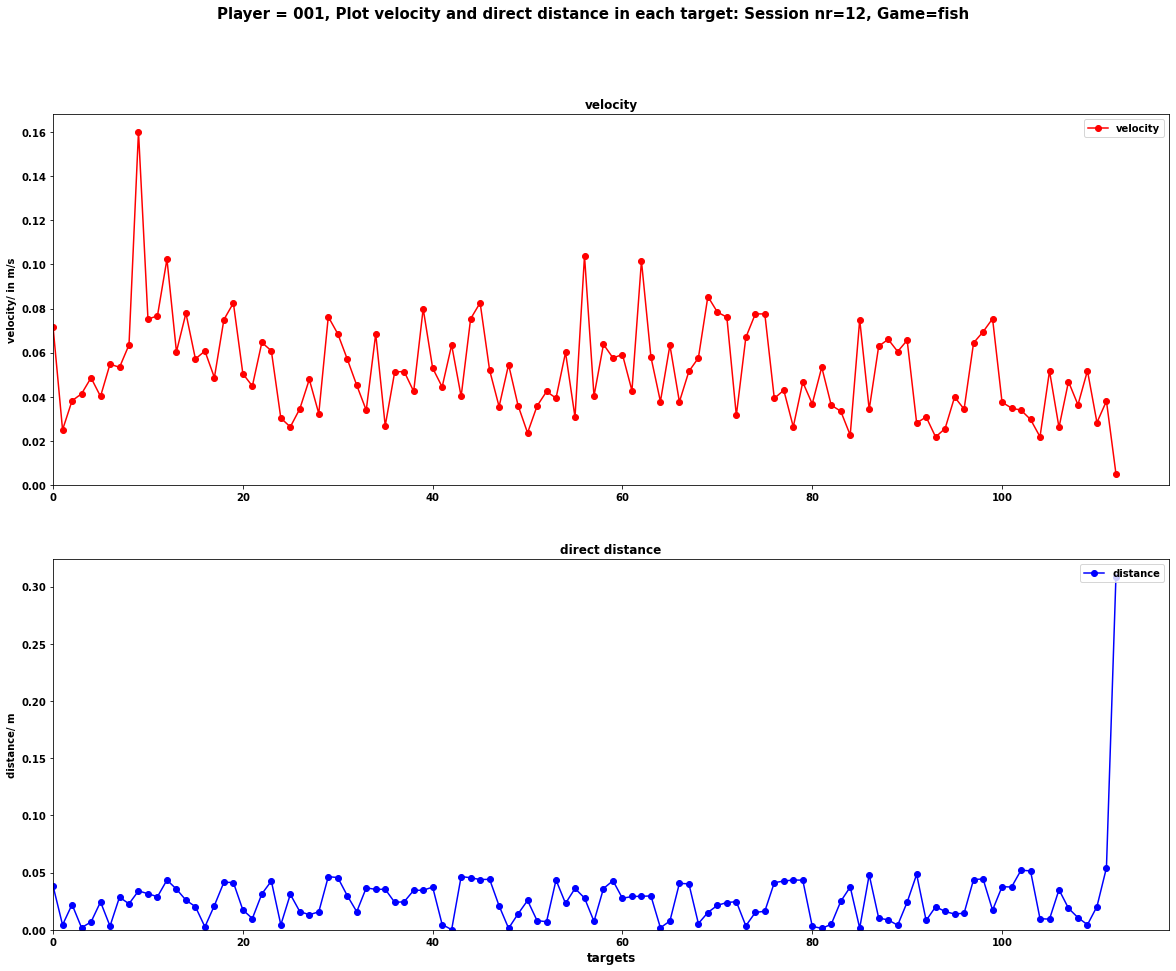

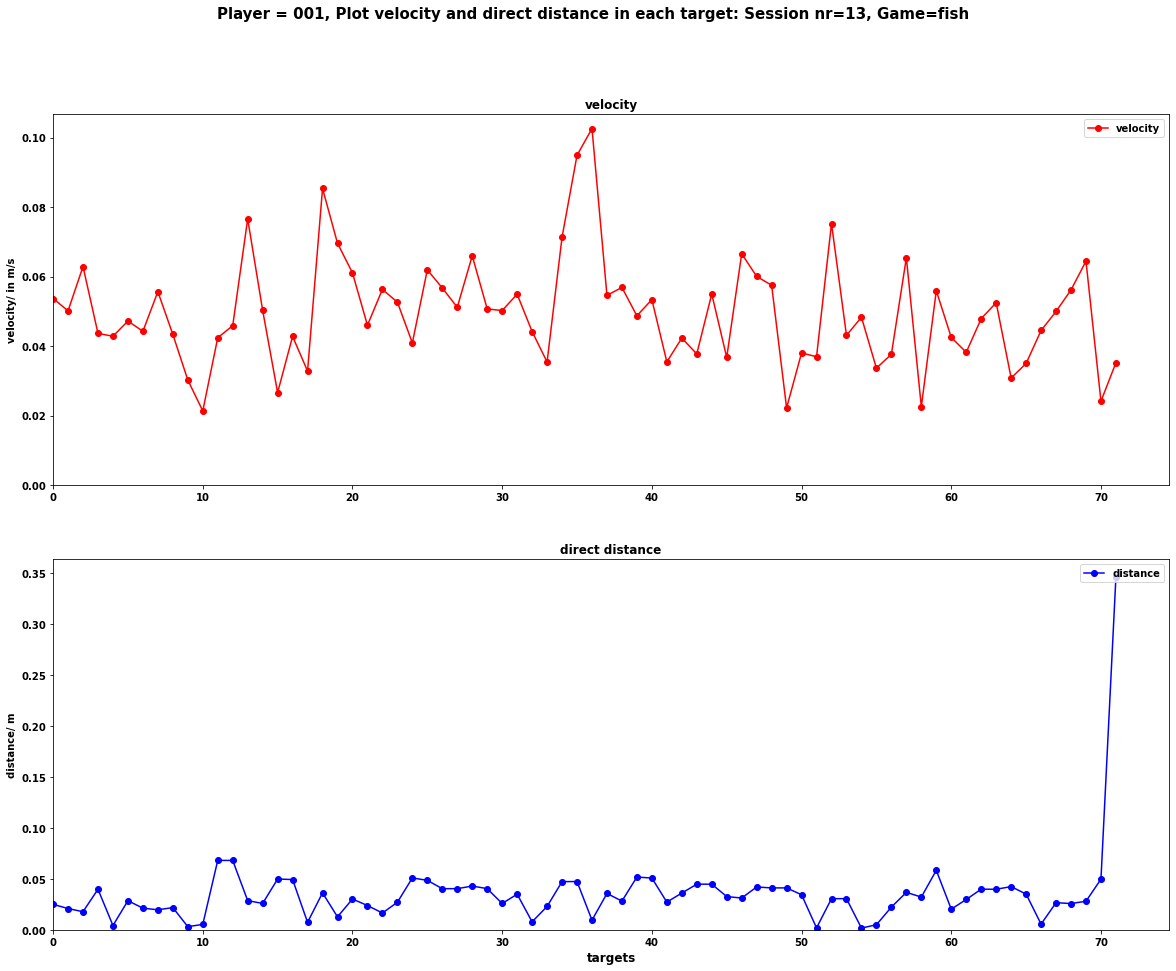

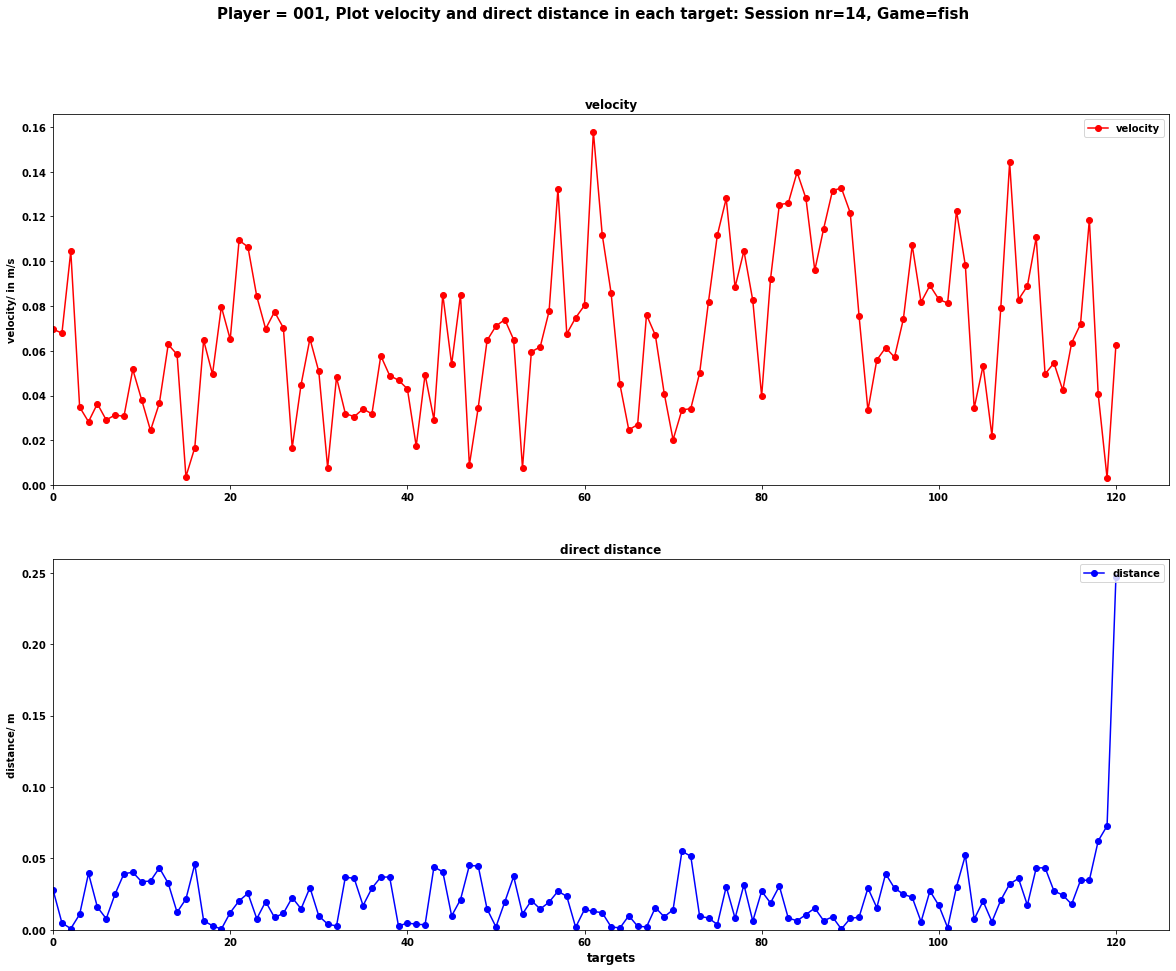

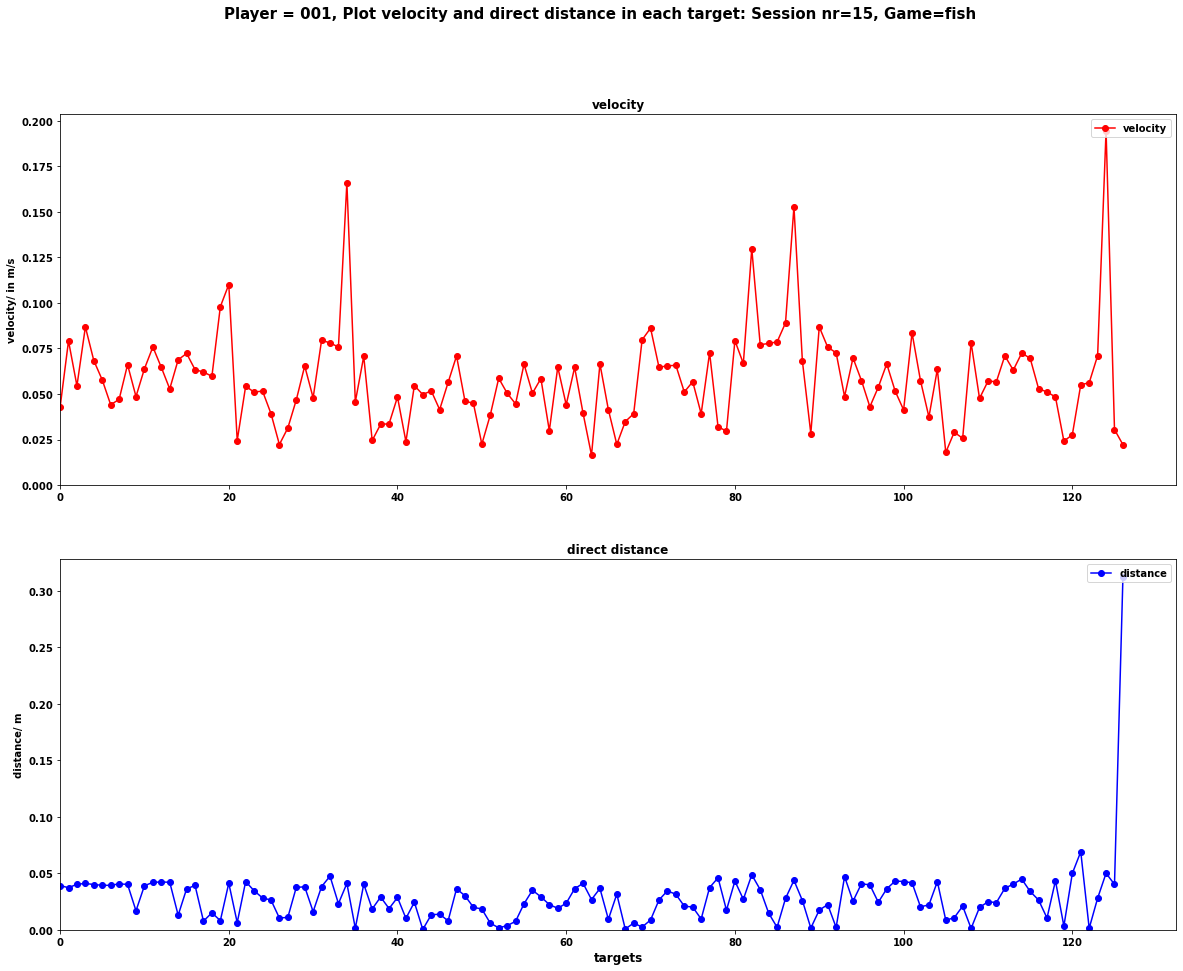

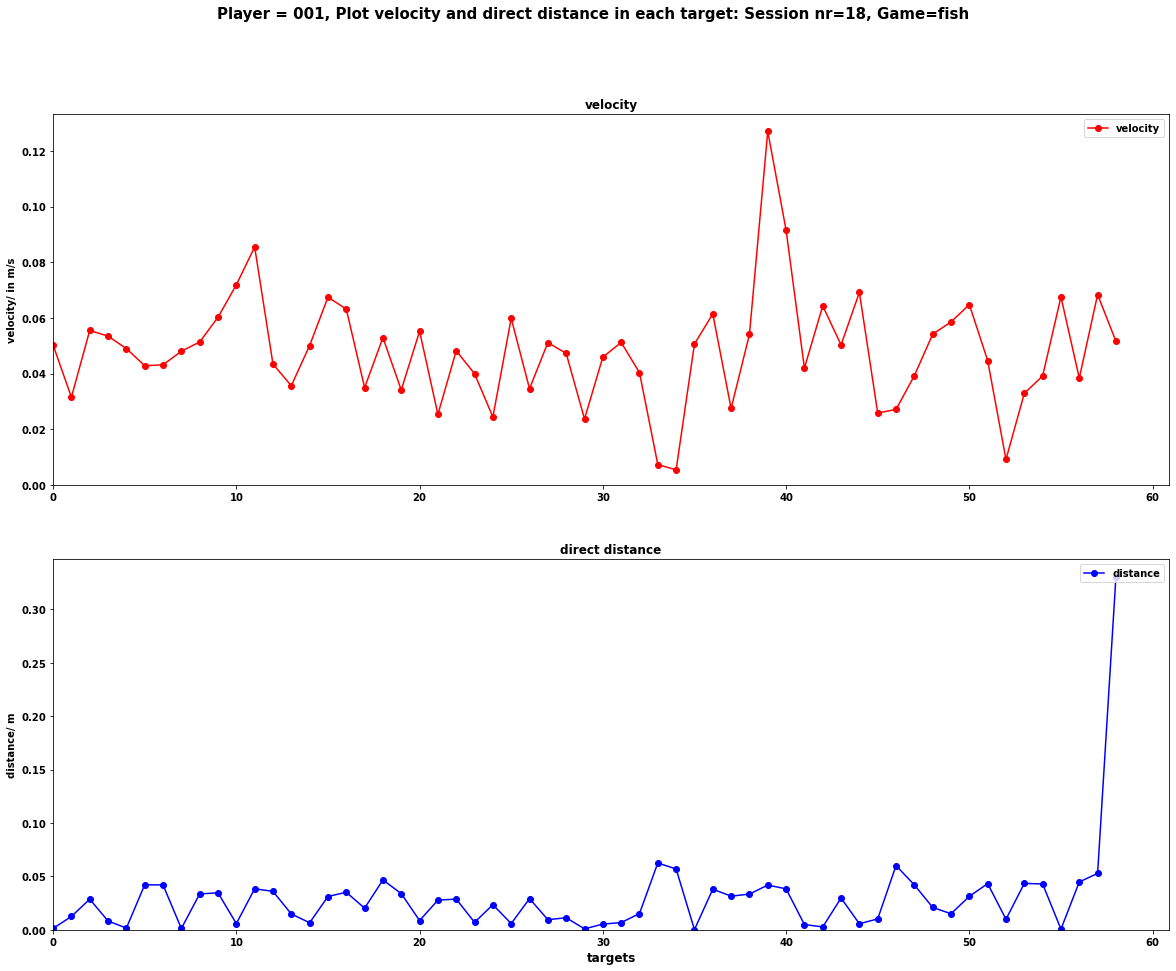

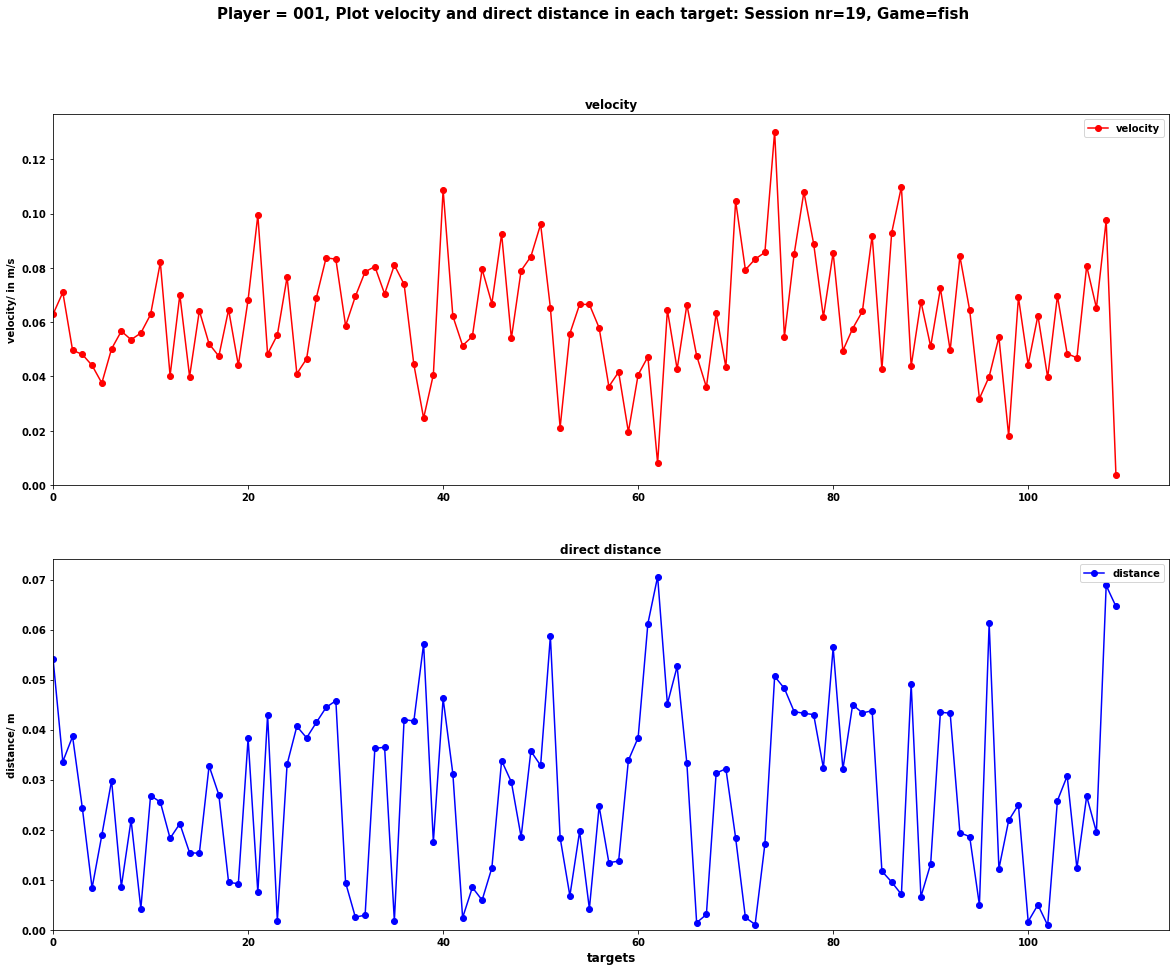

In [72]:
session_nr = []
fish_vel = []
fish_dist = []
fish_dist_mean = []
fish_dist_std = []
pct_time_basket = []

for session, df in enumerate(df_session):
    # analysis only for fish game
    game=1
    if game in df['GameID'].unique():
        df_game = df[df['GameID']==1]
        df_game['tsec'] = df_game[['TimeStampMS']].diff().cumsum(axis=0)/1000
        df_game['TimeStampMS_diff'] = df_game['TimeStampMS'].diff()
        
        fish_vel_mean = []
        fish_reach = []
        ## define repeats  
        repeats = df_game[df_game['TimeStampMS_diff']>40][['tsec','XCoordinate','YCoordinate']].reset_index().drop(columns=['index'])
        repeats.loc[-1] = df_game.iloc[0][['tsec','XCoordinate','YCoordinate']].fillna(0)  # adding the first row
        repeats.index = repeats.index + 1  # shifting index
        repeats.sort_index(inplace=True)
        
        ## calculate time diff between each catch
        repeats['tsec_diff'] = repeats['tsec'].diff()
        
        ## calculate velocity of each repeat per session
        repeats['velocity'] = np.nan
        for nr in range(0,len(repeats['tsec'])):
            if nr != (len(repeats['tsec'])-1):
                df_fish = df_game[(df_game['tsec']>=repeats.iloc[nr]['tsec']) & (df_game['tsec']<=repeats.iloc[nr+1]['tsec'])]
            else:
                if (repeats.iloc[nr]['tsec'] != df_game['tsec'].iloc[-1]):
                    df_fish = df_game[(df_game['tsec']>=repeats.iloc[nr]['tsec']) & (df_game['tsec']<=df_game['tsec'].iloc[-1])]
            
            df_fish[['tsec_diff','x_diff','y_diff']]=df_fish[['tsec','XCoordinate','YCoordinate']].diff()
            df_fish['step_size'] = np.sqrt(df_fish['x_diff']**2+df_fish['y_diff']**2)
            # vel in m/sec, dist in m
            fish_vel_mean.append((df_fish['step_size'].sum())/(df_fish['tsec_diff'].sum()))
            fish_reach.append(np.sqrt((df_fish['XCoordinate'].iloc[-1] - df_fish['XCoordinate'].iloc[0]) ** 2 + (df_fish['YCoordinate'].iloc[-1] - df_fish['YCoordinate'].iloc[0]) ** 2))
 
        repeats['velocity'] = fish_vel_mean
        repeats['reach'] = fish_reach
              
        ## velocity and direct distance between fish and basket
        x_0 = np.array_split(repeats['velocity'],20)[2:3][0]
        x_last = np.array_split(repeats['velocity'],20)[18:19][0]
        fish_vel_diff = np.mean(x_last) - np.mean(x_0)

        dist_0 = np.array_split(repeats['reach'],20)[2:3][0]
        dist_last = np.array_split(repeats['reach'],20)[18:19][0]
        fish_dist_diff = np.mean(dist_last) - np.mean(dist_0)
        fish_vel.append(fish_vel_diff)
        fish_dist.append(fish_dist_diff)
        
        session_nr.append(session)
        fish_dist_mean.append(repeats['reach'].iloc[:-1].mean())
        fish_dist_std.append(repeats['reach'].iloc[:-1].std())
        
        ## time lingering in basket
        df_game[['tsec_diff','y_diff']] = df_game[['tsec','YCoordinate']].diff()
        basket_linger = (df_game[(df_game['YCoordinate']<0.03) & (df_game['y_diff']==0)][['tsec_diff']].sum()/ df_game['tsec'].iloc[-1])*100
        pct_time_basket.append(basket_linger)
                
        # put fish_dist_parameters in df
        fish_dist_parameters = []
        for row in range(0,len(session_nr)):
            fish_dist_parameters.append(row)
        fish_dist_parameters = pd.DataFrame(fish_dist_parameters,columns=['session_nr'])  
        fish_dist_parameters['fish_dist_mean'] = fish_dist_mean
        fish_dist_parameters['fish_dist_std'] = fish_dist_std
        
        plot_fish_analysis(df_game)

        # save fig
        # note this will overwrite previously saved fig 
        results_path = os.path.join('data', 'results', patientid, 'fish')
        if not os.path.exists(results_path):
            os.makedirs(results_path)
        plt.savefig(results_path + '\\fig{}-fish.png'.format(session))
        plt.show()

##### Plot mean and std of direct distance (between fish and basket) over sessions

No handles with labels found to put in legend.


Less distance moved by linear coefficient of -0.000003 as gameplay progresses.


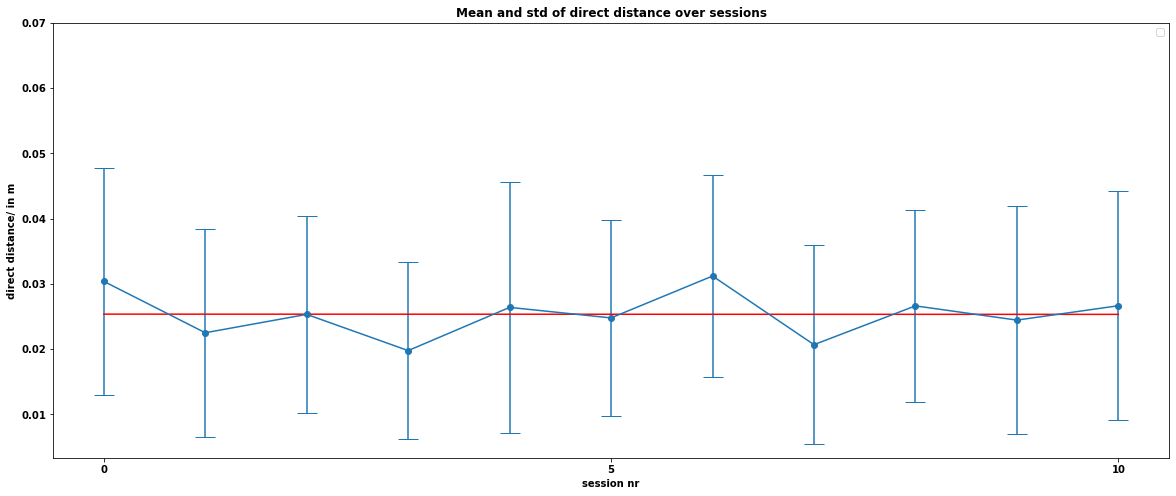

In [74]:
plt.figure(figsize=(20,8))
plt.errorbar(fish_dist_parameters['session_nr'], fish_dist_parameters['fish_dist_mean'], fish_dist_parameters['fish_dist_std'], marker='o', capsize=10)

# plot trendline (just a linear fitting)
z = np.polyfit(fish_dist_parameters['session_nr'], fish_dist_parameters['fish_dist_mean'], 1)
p = np.poly1d(z)
plt.plot(fish_dist_parameters['session_nr'],p(fish_dist_parameters['session_nr']),'r-')
# print('y=%.6fx+(%.6f)'%(z[0],z[1]))

if z[0] > 0:
    print(f'More distance moved by linear coefficient of {z[0]:.6f} as gameplay progresses.')
else:
    print(f'Less distance moved by linear coefficient of {z[0]:.6f} as gameplay progresses.')

plt.xlabel('session nr')
plt.ylim(top=0.07)
plt.ylabel('direct distance/ in m')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.title('Mean and std of direct distance over sessions',fontsize=12)
plt.legend()

plt.savefig(main_results_path + '\\fish_dist_mean_std.png',bbox_inches = "tight")
plt.show();

##### Plot difference in targets velocity over sessions

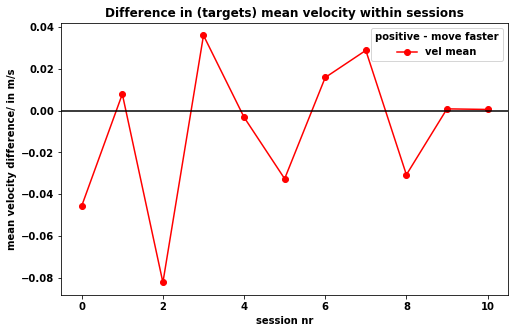

In [75]:
plt.figure(figsize=(8,5))
plt.plot(pd.DataFrame(fish_vel),color='red',marker='o',label='vel mean')
plt.axhline(y=0, color='black',linestyle='-')
plt.xlabel('session nr')
plt.ylabel('mean velocity difference/ in m/s')
plt.title('Difference in (targets) mean velocity within sessions',fontsize=12)
plt.legend(title='positive - move faster')

plt.savefig(main_results_path + '\\fish_targets_vel_mean.png',bbox_inches = "tight")
plt.show();

##### Plot difference in direct distance (between fish and basket) over sessions

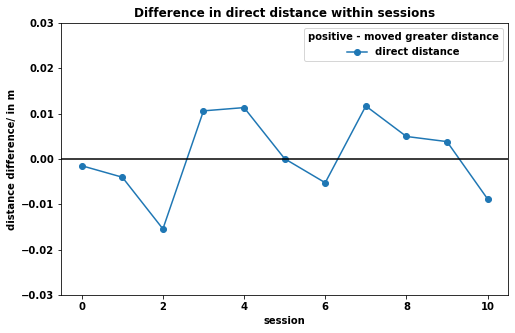

In [76]:
plt.figure(figsize=(8,5))
plt.plot(pd.DataFrame(fish_dist), marker='o',label='direct distance')
plt.axhline(y=0, color='black',linestyle='-')
plt.xlabel('session')
plt.ylim([-0.03,0.03])
plt.ylabel('distance difference/ in m')
plt.title('Difference in direct distance within sessions',fontsize=12)
plt.legend(title='positive - moved greater distance')

plt.savefig(main_results_path + '\\fish_direct_distance.png',bbox_inches = "tight")
plt.show();

##### Plot pct time spent lingering in basket

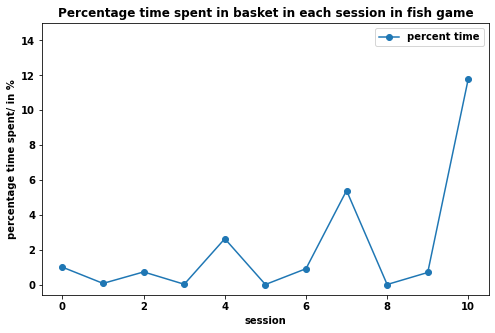

In [77]:
plt.figure(figsize=(8,5))
plt.plot(pd.DataFrame(pct_time_basket), marker='o',label='percent time')
plt.xlabel('session')
plt.ylabel('percentage time spent/ in %')
plt.ylim(top=15)
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(2))
plt.title('Percentage time spent in basket in each session in fish game',fontsize=12)
plt.legend()

plt.savefig(main_results_path + '\\fish_time_basket.png',bbox_inches = "tight")
plt.show();

#### Plot coordinates

**declare path for saving fig**
<br> new path/folder declared in this section  again

In [78]:
# declared for plotting and savefig
# double checking
patientid = df['PatientID'].unique()[0]
if type(patientid) != str:
    patientid = '00' + df['PatientID'].unique()[0].astype(str)
patientid

'001'

**determine between assistive 'A' vs perturbation 'P' modes**
<br> assistance: visual == target
<br> perturbation: visual != target (handle trying to reach visual)

In [79]:
def define_haptics(row):
    if row['TargetXCoord']==row['VisualTargetXCoord']:
        row['haptics']='A'
    else:
        row['haptics']='P'
    return row

In [80]:
def change_Kx(row):
    if row['mode'] == 'P':
        row['KxGain'] *= -1
    return row

In [81]:
def plot_coord(tset):
    '''function to plot coordinates, defined by change in A-P modes'''
    fig = plt.figure(figsize=(20,15))
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
       
    ax1.scatter(tset['tsec'],tset['XCoordinate'],s=5,color='red',ls='None',label='X coord');
    if game==0: # only plot TargetX for explore
        ax1.scatter(tset['tsec'],tset['TargetXCoord'],s=20,color='green',ls='None',label='X Target');
#         ax1.scatter(tset['tsec'],tset['VisualTargetXCoord_roll'],s=10,color='orange');

        # plot vertical lines for repeats
        my_labels = {'xcoords': 'repeat'}
        xcoords = np.nan_to_num(tset[tset['VisualTargetXCoord_diff']!=0]['tsec'])
        
        for xc in xcoords:
            ax1.axvline(x=xc,ls='--',label=my_labels['xcoords'])
            my_labels['xcoords']='_nolegend_'
    
    ax1.set_xlim(left=0);
    ax1.set_ylabel('x-coord')
    ax1.legend(loc='upper right')
    ax1.set_title('X coordinates');

    ax2.scatter(tset['tsec'],tset['YCoordinate'],s=5,color='blue',label='Y coord');
    if game==0: # only plot TargetX for explore
        ax2.scatter(tset['tsec'],tset['TargetYCoord'],s=20,color='green',label='Y Target');
        
        my_labels = {'xcoords': 'repeat'}
        for xc in xcoords:
            ax2.axvline(x=xc,ls='--',label=my_labels['xcoords'])
            my_labels['xcoords']='_nolegend_'
            
    ax2.set_xlim(left=0);
    ax2.set_ylabel('y-coord')
    ax2.legend(loc='upper right')
    ax2.set_title('Y coordinates');

    plt.suptitle('Player = {}, Plot coordinates: Session nr={}, Game={} '.format(patientid, session, gamename),fontsize=15)
    plt.xlabel('time/ in sec',fontsize=12);

In [82]:
for session, df in enumerate(df_session):
    for game in range(0,df1['GameID'].nunique()):
        if game in df['GameID'].unique():
            df_game = df[df['GameID']==game]
            df_game['tsec'] = df_game[['TimeStampMS']].diff().cumsum(axis=0)/1000
            
            # mode change only for explore game
            if game==0:
                # define vertical lines for change in haptics
                df_game['VisualTargetXCoord_diff'] = df_game['VisualTargetXCoord'].diff()
                
                # assumption is that VisualTarget is delayed by ONE phase, and sessionID has been corrected
                # drop first value of VisualTarget (from previous session?)
                visual1 = df_game[df_game['VisualTargetXCoord_diff']!=0][['VisualTargetXCoord']].iloc[1:,:].reset_index().drop(columns=['index'])
                df_game['TargetXCoord_diff'] = df_game['TargetXCoord'].diff()
                # drop last value of Target
                target1 = df_game[df_game['TargetXCoord_diff']!=0][['tsec','TargetXCoord']][:-1].reset_index().drop(columns=['index'])
                # merge and compare both values to determine mode
                target_visual = pd.merge(target1,visual1,left_index=True, right_index=True).fillna(0)
                target_visual = target_visual.apply(define_haptics,axis=1)
            
            # label plots
            if game==0:
                gamename='explore'
            elif game==1:
                gamename='fish'
            elif game==2:
                gamename='drone'
             
            # plot fig
            plot_coord(df_game)
            
            # save fig
            # note this will overwrite previously saved fig 
            results_path = os.path.join('data', 'results', patientid, 'coord')
            if not os.path.exists(results_path):
                os.makedirs(results_path)
            plt.savefig(results_path + '\\fig{}-{}.png'.format(session,gamename))
            plt.show()

#### Plot Stiffness (Kxx) and Force

In [83]:
def plot_k_force(tset):
    '''function to plot stiffness Kx and forces calculated, only for explore game'''
    # only plot for explore game
    fig = plt.figure(figsize=(20,15))
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    
    ## plot K
    ax1.scatter(tset['tsec'],tset['KxGain'],s=5,color='blue',label='K_xx');
    # only calculate/plot for explore game
    if game==0: 
        # plot vertical lines for repeats
        my_labels = {'xcoords': 'repeat'}
        xcoords = np.nan_to_num(tset[tset['VisualTargetXCoord_diff']!=0]['tsec'])
        
        for xc in xcoords:
            ax1.axvline(x=xc,ls='--',label=my_labels['xcoords'])
            my_labels['xcoords']='_nolegend_'

    ax1.set_xlim(left=0);
    ax1.set_ylabel('K_xx')
    ax1.legend(loc='upper right')
    ax1.set_title('K_xx');

    ## plot forces
    ax2.axhline(y=21, color='green', linestyle='--',label='F_max')
    ax2.scatter(tset['tsec'],tset['TotalForce'],s=6,color='red',label='F_total');
#     ax2.scatter(tset['tsec'],tset['F_spring'],s=3,color='cyan',label='F_spring');
    ax2.scatter(tset['tsec'],tset['F_sens'],s=3,color='black',label='F_sens');
    
    if game==0: # only plot for explore
        # plot vertical lines for repeats
        my_labels = {'xcoords': 'repeat'}

        for xc in xcoords:
            ax2.axvline(x=xc,ls='--',label=my_labels['xcoords'])
            my_labels['xcoords']='_nolegend_'
           
    ax2.set_xlim(left=0);
    ax2.set_ylabel('Force/N')
    ax2.legend(loc='upper right')
    ax2.set_title('Total Force');
    
    plt.suptitle('Player = {}, Plot K_xx and Forces: Session nr={}, Game=explore'.format(patientid, session),fontsize=15)
    plt.xlabel('time/ in sec',fontsize=12);

In [84]:
# parameters to calculate F_sens, determined by current passing thru motors
rp = 0.016    # radius of pulley
J_p_th = np.array([[rp/2,rp/2],[rp/2,-rp/2]])   # jacobian matrix
J_p_th = np.transpose(J_p_th)

session_nr = []
game_nr = []
F_deficit_mean = []
F_deficit_std = []
F_sens_mean = []
F_sens_std = []
Fsens_21 =[]
Ftot_21 = []
Fspring_21 = []
kx_mean = []
kx_std = []
Kx_r_q3 = []
Kx_range = []
Kx_Atime = []
Kx_Ptime = []
help_mode = []
haptics_rho = []
haptics_pvalue = []
repeatn = []

for session, df in enumerate(df_session):
    # only calculate for explore game
    game=0
    if game in df['GameID'].unique():
        df_game = df[df['GameID']==0]
        df_game['tsec'] = df_game[['TimeStampMS']].diff().cumsum(axis=0)/1000
        df_game['TimeStampMS_diff'] = df_game['TimeStampMS'].diff()
        
        ## Kx      
        # moving median is more robust, since it recovers the underlying trend of the discrete Kx
        # taken into account only +ve values
        Kx_r_pos = df_game['KxGain'].rolling(1000).median()
        
        ## calculate F_spring
        # distance to target
        df_game['dist_targ'] = np.sqrt((df_game['TargetXCoord'] - df_game['XCoordinate'])**2 + (df_game['TargetYCoord'] - df_game['YCoordinate'])**2)
        df_game['F_spring'] = df_game['KxGain']*df_game['dist_targ']
        
        ## define A-P mode 
        # define vertical lines for change in haptics
        df_game['VisualTargetXCoord_diff'] = df_game['VisualTargetXCoord'].diff()
     
        # assumption is that VisualTarget is delayed by ONE phase, and sessionID has been corrected
        # drop first value of VisualTarget (from previous session?)
        visual1 = df_game[df_game['VisualTargetXCoord_diff']!=0][['VisualTargetXCoord']].iloc[1:,:].reset_index().drop(columns=['index'])
        df_game['TargetXCoord_diff'] = df_game['TargetXCoord'].diff()
        # drop last value of Target
        target1 = df_game[df_game['TargetXCoord_diff']!=0][['tsec','TargetXCoord']][:-1].reset_index().drop(columns=['index'])
        # merge and compare both values to determine mode
        target_visual = pd.merge(target1,visual1,left_index=True, right_index=True).fillna(0)
        target_visual = target_visual.apply(define_haptics,axis=1)

        # assumption is that mode change starts exactly on defined tsec 
        # no info on last haptic, since VisualTarget unknown within same session
        df_game['mode'] = np.nan
        for start, time in enumerate(target_visual['tsec']):
            if start != (target_visual['tsec'].size-1):
                df_game['mode'].loc[(df_game['tsec']>=target_visual['tsec'][start]) & (df_game['tsec']<target_visual['tsec'][start+1])] = target_visual['haptics'].iloc[start]
     
        ## Kx
        # negate Kx if in P mode
        df_game = df_game.apply(change_Kx,axis=1)
        
        # moving median taken into account -ve values
        Kx_r_neg = df_game['KxGain'].rolling(1000).median()
        
        ## detect help_mode, change in gradient
        target_visual['gradient'] = np.nan
        for start, time in enumerate(target_visual['tsec']):
            if start != (target_visual['tsec'].size-1):
                target_visual['gradient'].iloc[start] = df_game[(df_game['tsec']>=target_visual['tsec'][start]) & (df_game['tsec']<target_visual['tsec'][start+1])][['KxGain']].agg(np.ptp).values[0]
            else:
                last_repeattime = df_game[df_game['TargetXCoord_diff']!=0][['tsec','TargetXCoord']].iloc[-1].values[0]
                target_visual['gradient'].iloc[start] = df_game[(df_game['tsec']>=target_visual['tsec'][start]) & (df_game['tsec']<last_repeattime)][['KxGain']].agg(np.ptp).values[0]
        
        ## define forces
        df_game['tau_a_left'] = 0.0398*df_game['CurrentSenseLeft']
        df_game['tau_a_right'] = 0.0398*df_game['CurrentSenseRight']
        
        # calculate F_sens
        F_sens = []
        for i in range(0,len(df_game['tau_a_left'])):
            # matlab's equivalent in the least squares sense to the under- or overdetermined system of equations AX = B
            mat = np.linalg.lstsq(J_p_th , np.array([df_game['tau_a_left'].iloc[i], df_game['tau_a_right'].iloc[i] 
                                                    ]).reshape(2,1))[0]
            mat_norm = np.linalg.norm(mat,1)
            F_sens.append(mat_norm)
        df_game['F_sens'] = F_sens
        df_game['F_deficit'] = df_game['F_sens']/df_game['TotalForce']
        
        # determine correlation between F_sens and KxGain
        rho, p = scipy.stats.spearmanr(df_game['F_sens'].rolling(1000).median().dropna(),df_game['KxGain'].rolling(1000).median().dropna())
        
        ## put in df
        ## Forces
        # calculate required mertrics from forces
        session_nr.append(session)
        game_nr.append(game)
        F_deficit_mean.append(df_game['F_deficit'].replace(np.inf,np.nan).dropna().mean())
        F_deficit_std.append(df_game['F_deficit'].replace(np.inf,np.nan).dropna().std())
        F_sens_mean.append(df_game['F_sens'].mean())
        F_sens_std.append(df_game['F_sens'].std())
        # convert to sec, convert to percentage
        Ftot_21.append((df_game[df_game['TotalForce']>21][['TimeStampMS_diff']].sum().values[0]/1000)/(df_game['tsec'].iloc[-1])*100)
        Fsens_21.append((df_game[df_game['F_sens']>21][['TimeStampMS_diff']].sum().values[0]/1000)/(df_game['tsec'].iloc[-1])*100)
        Fspring_21.append((df_game[df_game['F_spring']>21][['TimeStampMS_diff']].sum().values[0]/1000)/(df_game['tsec'].iloc[-1])*100)
        help_mode.append(target_visual[(target_visual['gradient']!=0) & (abs(target_visual['gradient'])>=100)][['gradient']].count().values[0])
        haptics_rho.append(rho)
        haptics_pvalue.append(p)
        
        # put in F_parameters df
        F_parameters = []
        for row in range(0,len(session_nr)):
            F_parameters.append(row)
        F_parameters = pd.DataFrame(F_parameters,columns=['session_nr'])   
        F_parameters['session_nr'] = session_nr
        F_parameters['game_nr'] = game_nr
        F_parameters['F_deficit_mean'] = F_deficit_mean
        F_parameters['F_deficit_std'] = F_deficit_std
        F_parameters['F_sens_mean'] = F_sens_mean
        F_parameters['F_sens_std'] = F_sens_std
        F_parameters['Ftot_21'] = Ftot_21
        F_parameters['Fsens_21'] = Fsens_21
        F_parameters['Fspring_21'] = Fspring_21
        F_parameters['help_mode'] = help_mode
        F_parameters['haptics_rho'] = haptics_rho 
        F_parameters['haptics_pvalue'] = haptics_pvalue 
        
        ## Kx
        # calculate required metrics from Kx
        Kx_r_q3.append(np.array_split(Kx_r_neg,4)[3].median())    # Kx median at last quadrant
        kx_mean.append(df_game[['KxGain']].mean().values[0])   # Kx mean (inc neg values) in session
        kx_std.append(df_game[['KxGain']].std().values[0])
        Kx_range.append(Kx_r_pos.max()-Kx_r_pos.min())   # Kx range in session
        Kx_Atime.append(df_game[df_game['mode']=='A'][['TimeStampMS_diff']].sum().values[0]/1000)   
        Kx_Ptime.append(df_game[df_game['mode']=='P'][['TimeStampMS_diff']].sum().values[0]/1000)
        repeatn.append(df_game[df_game['TargetXCoord_diff']!=0][['TargetXCoord']].count().values[0])
        
        # put in Kx_parameters df
        Kx_parameters = []
        for row in range(0,len(session_nr)):
            Kx_parameters.append(row)
        Kx_parameters = pd.DataFrame(Kx_parameters,columns=['session_nr'])   
        Kx_parameters['session_nr'] = session_nr
        Kx_parameters['game_nr'] = game_nr
        Kx_parameters['Kx_r_q3'] = Kx_r_q3
        Kx_parameters['kx_mean'] = kx_mean
        Kx_parameters['kx_std'] = kx_std
        Kx_parameters['Kx_range'] = Kx_range            
        Kx_parameters['Kx_Atime'] = Kx_Atime
        Kx_parameters['Kx_Ptime'] = Kx_Ptime
        Kx_parameters['repeatn'] = repeatn
        
        # plot
        plot_k_force(df_game)
      
        # save fig
        # note this will overwrite previously saved fig 
        results_path = os.path.join('data', 'results', patientid, 'stiffness_force')
        if not os.path.exists(results_path):
            os.makedirs(results_path)
        plt.savefig(results_path + '\\fig{}-explore.png'.format(session))
        plt.show()

#### Special condition: F_sens=0

#### Calculate theoretical stiffness values

In [85]:
def plot_k_theory(tset):
    plt.figure(figsize=(8,5))
    abs(tset['k_theory']).plot(label='theoretical Kx')
    tset['KxGain'].plot(label='actual Kx'); 
    plt.xlabel('target nr')
    plt.ylabel('stiffness')
    plt.title('Player = {}, Comparison between theoretical and actual stiffness values: Session nr={}, Game=explore'.format(patientid, session),fontsize=12)
    plt.legend()
    

In [86]:
## Calculate theoretical Kx for explore game
## act as a standalone cell, if necessary
list_of_kager = []
for session, df in enumerate(df_session):
    game=0
    if game in df['GameID'].unique():
        df_game = df[df['GameID']==0]
        df_game['tsec'] = df_game[['TimeStampMS']].diff().cumsum(axis=0)/1000
        df_game['TimeStampMS_diff'] = df_game['TimeStampMS'].diff()
        
        ## define repeats
        df_game['VisualTargetXCoord_diff'] = df_game['VisualTargetXCoord'].diff()
        visual1 = df_game[df_game['VisualTargetXCoord_diff']!=0][['VisualTargetXCoord']].iloc[1:,:].reset_index().drop(columns=['index'])
        df_game['TargetXCoord_diff'] = df_game['TargetXCoord'].diff()
        target1 = df_game[df_game['TargetXCoord_diff']!=0][['tsec','TargetXCoord']][:-1].reset_index().drop(columns=['index'])
        target_visual = pd.merge(target1,visual1,left_index=True, right_index=True).fillna(0)
                   
        kager_pre = df_game[df_game['TargetXCoord_diff']!=0][['tsec','Sparc','KxGain']].reset_index().drop(columns=['index']).fillna(0)
        kager = pd.merge(target_visual,kager_pre,on='tsec')

        gamma = 0.05
        alpha = 15
        beta = 1.0
        mu_star = 1.6491
        sigma_star = 0.2038
        delta = 1.5
        n = 5
        kager['KxGain'] = abs(kager['KxGain'])
        kager['mu_k'] = 0
        kager['mu_k'] = kager['Sparc'].rolling(5).mean()
        kager['e_k'] = ((abs(kager['mu_k'])-mu_star)/(delta*sigma_star))-1
        kager['e_k'] = kager['e_k'].clip(lower=-8,upper=8)
        kager['e_k_diff'] = kager['e_k'].diff()
        kager = kager.fillna(0)

        k_theory=[]
        for i in range(0,len(kager['KxGain'])):
            if i<5:
                # irrespective of first 5 values of KxGain 
                KxGain_new = kager['KxGain'].iloc[i]
                k_theory.append(KxGain_new)
            else:
                if KxGain_new > 0:
                    gamma = 0.05
                else:
                    gamma = 0
                KxGain_new = (1-gamma)*KxGain_new + alpha*kager['e_k'].iloc[i] + beta*kager['e_k_diff'].iloc[i]
                k_theory.append(np.clip(KxGain_new,-2000,2000))

        kager['k_theory'] = k_theory
        kager['session'] = session
        list_of_kager.append(kager)

        # plot
        plot_k_theory(kager)
        
#         # save fig
#         # note this will overwrite previously saved fig 
        results_path = os.path.join('data', 'results', patientid, 'theoretical_kx')
        if not os.path.exists(results_path):
            os.makedirs(results_path)
        plt.savefig(results_path + '\\fig{}-explore.png'.format(session))
        plt.show();

##### Curve fitting

In [87]:
# plot polyfit curve k_theory
def plot_k_theory_real(df_kager):
    '''this function plots the calculated stiffness values and the fitted curve'''
    session = df_kager['session'][0]
    plt.figure(figsize=(8,5))
    plt.plot(df_kager['k_theory'])
    plt.plot(df_kager.index,p(df_kager.index),'r-');
    plt.xlabel('target nr')
    plt.ylabel('stiffness')
    plt.title('Curve fitting of stiffness values: Session nr={}, Game=explore'.format(session),fontsize=12)
    plt.show();

In [88]:
K_f = []
kager_median = []
kager_MAD = []
for nr, kager in enumerate(list_of_kager):
    # determine change in median and MAD
    x_0 = np.array_split(kager['k_theory'],20)[2:3][0]
    x_last = np.array_split(kager['k_theory'],20)[18:19][0]
    median_0 = np.median(x_0)
    MAD_0 = scipy.stats.median_abs_deviation(x_0)
    median_last = np.median(x_last)
    MAD_last = scipy.stats.median_abs_deviation(x_last)
    
    median_diff = median_last - median_0
    MAD_diff = MAD_last - MAD_0
    kager_median.append(median_diff)
    kager_MAD.append(MAD_diff)
    
    # determine and plot polyfit 
    z = np.polyfit(kager.index,kager['k_theory'], 20)
    p = np.poly1d(z)
    kager['curve_fit'] = np.polyval(z,kager.index)
    
    # calculate K_f
    K_f.append(kager['curve_fit'].iloc[-1])
    
    # plot
    plot_k_theory_real(kager) 

##### Over session performance
<br> **Final K_f values**

No handles with labels found to put in legend.


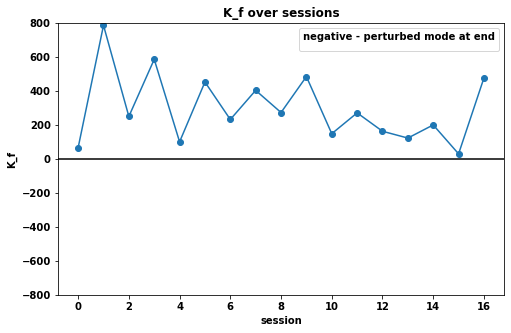

In [89]:
# plot final stiffness value final K_f over sessions
plt.figure(figsize=(8,5))
plt.plot(pd.DataFrame(K_f), marker='o')
plt.axhline(y=0, color='black',linestyle='-')
plt.xlabel('session')
plt.ylabel('K_f')
plt.ylim([-800,800])
plt.title('K_f over sessions',fontsize=12)
plt.legend(title='negative - perturbed mode at end')

plt.savefig(main_results_path + '\\final_theoretical_Kx.png',bbox_inches = "tight")
plt.show();

##### Within session performance (using median and MAD values)
<br> **Over repeatn/targets performance**
<br> **median and MAD values**

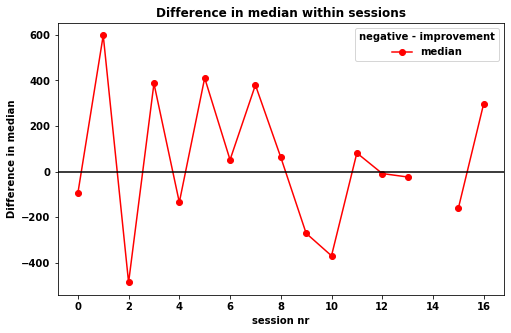

In [90]:
plt.figure(figsize=(8,5))
plt.plot(pd.DataFrame(kager_median),color='red',marker='o',label='median')
plt.axhline(y=0, color='black',linestyle='-')
plt.xlabel('session nr')
plt.ylabel('Difference in median')
plt.title('Difference in median within sessions',fontsize=12)
plt.legend(title='negative - improvement')

plt.savefig(main_results_path + '\\theoretical_Kx_median.png',bbox_inches = "tight")
plt.show();

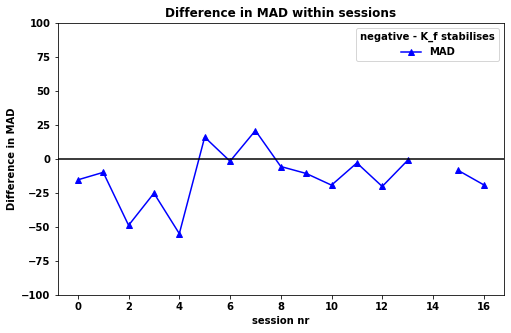

In [91]:
plt.figure(figsize=(8,5))
plt.plot(pd.DataFrame(kager_MAD),color='blue',marker='^',label='MAD')
plt.axhline(y=0, color='black',linestyle='-')
plt.xlabel('session nr')
plt.ylabel('Difference in MAD')
plt.ylim([-100,100])
plt.title('Difference in MAD within sessions',fontsize=12)
plt.legend(title='negative - K_f stabilises')

plt.savefig(main_results_path + '\\theoretical_Kx_MAD.png',bbox_inches = "tight")
plt.show();

##### Correlation between initial K_f vs change in K_f

In [92]:
# save df to csv
pd.DataFrame(K_f).to_csv('./data/P' + patientid + '_K_f.csv')
pd.DataFrame(kager_median).to_csv('./data/P' + patientid + '_K_f_median.csv')
pd.DataFrame(kager_MAD).to_csv('./data/P' + patientid + '_K_f_MAD.csv')

#### Drone game analysis: Damping force

In [93]:
# damping_mat = np.array([[tset['BxGain'],tset['BxyGain']],[tset['ByxGain'],tset['ByGain']]])   # damping matrix
session_nr = []
F_damp_mean = []
F_damp_std = []
for session, df in enumerate(df_session):
    D_Fx = []
    D_Fy = [] 
    F_damp = []
    # analysis only for drone game
    game=2
    if game in df['GameID'].unique():
        df_game = df[df['GameID']==2]
        df_game['tsec'] = df_game[['TimeStampMS']].diff().cumsum(axis=0)/1000
        df_game['TimeStampMS_diff'] = df_game['TimeStampMS'].diff()
        
        ## calculate damping force
        for i in range(0,len(df_game['BxGain'])):
            # no change in damping matrix in session
            BxGain = df_game['BxGain'].iloc[0]
            BxyGain = df_game['BxyGain'].iloc[0]
            ByxGain = df_game['ByxGain'].iloc[0]
            ByGain = df_game['ByGain'].iloc[0]
            d = np.array([[BxGain,BxyGain],[ByxGain,ByGain]]) 
            
            VelocityX = df_game['VelocityX'].iloc[i]
            VelocityY = df_game['VelocityY'].iloc[i]
            v = np.array([VelocityX,VelocityY])
            
            Dx, Dy = d.dot(v)
            D_Fx.append(Dx)
            D_Fy.append(Dy)
            F_damp.append(math.sqrt(Dx ** 2 + Dy ** 2))
        
        session_nr.append(session)
        df_game['D_Fx'] = D_Fx
        df_game['D_Fy'] = D_Fy
        df_game['F_damp'] = F_damp
        F_damp_mean.append(df_game['F_damp'].mean())
        F_damp_std.append(df_game['F_damp'].std())
        
        # put in F_damp_parameters df
        F_damp_parameters = []
        for row in range(0,len(session_nr)):
            F_damp_parameters.append(row)
        F_damp_parameters = pd.DataFrame(F_damp_parameters,columns=['session_nr'])  
        F_damp_parameters['F_damp_mean'] = F_damp_mean
        F_damp_parameters['F_damp_std'] = F_damp_std

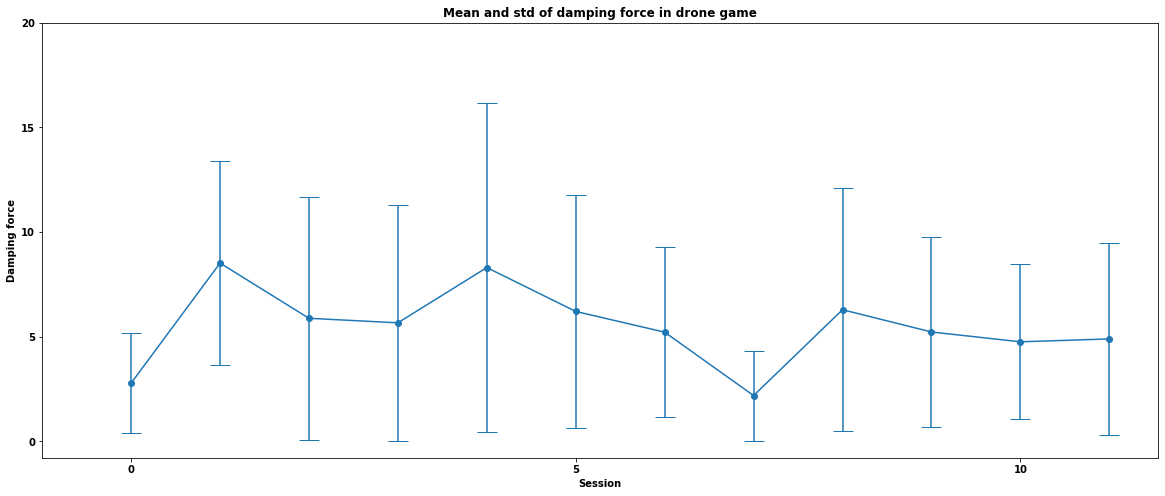

In [94]:
plt.figure(figsize=(20,8))
plt.errorbar(F_damp_parameters['session_nr'], F_damp_parameters['F_damp_mean'], F_damp_parameters['F_damp_std'], marker='o', capsize=10)
plt.xlim(left=-1);
plt.ylim(top=20)
plt.xlabel('Session')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(5))
plt.ylabel('Damping force')
plt.title('Mean and std of damping force in drone game')

plt.savefig(main_results_path + '\\F_damp_drone.png',bbox_inches = "tight")
plt.show();

#### Kxx parameters

In [96]:
Kx_parameters['total_time'] = Kx_parameters['Kx_Atime'] + Kx_parameters['Kx_Ptime']
Kx_parameters['A_fractiontime'] = Kx_parameters['Kx_Atime']/Kx_parameters['total_time']
Kx_parameters['P_fractiontime'] = Kx_parameters['Kx_Ptime']/Kx_parameters['total_time']
Kx_parameters.rename(columns={'A_fractiontime': 'in A mode',
                    'P_fractiontime': 'in P mode'}, inplace=True)
Kx_parameters = Kx_parameters.set_index(['session_nr'])

In [97]:
A_fractiontime = Kx_parameters['in A mode'].mean()
P_fractiontime = Kx_parameters['in P mode'].mean()
print(f'Player{patientid} spent a mean fraction of {A_fractiontime:.3f} in assistive mode and {P_fractiontime:.3f} in perturbed mode')

Player001 spent a mean fraction of 0.693 in assistive mode and 0.307 in perturbed mode


In [98]:
# split data to quadrants
# time spent in assistive mode in first/last quadrant
A_time_q0 = np.array_split(Kx_parameters['in A mode'],4)[0].mean()
A_time_q3 = np.array_split(Kx_parameters['in A mode'],4)[3].mean()

# time spent in perturbed mode in first/last quadrant
P_time_q0 = np.array_split(Kx_parameters['in P mode'],4)[0].mean()
P_time_q3 = np.array_split(Kx_parameters['in P mode'],4)[3].mean()

print(f'Player{patientid} spent in first quadrant, a mean fraction time of {A_time_q0:.3f} in assistive mode and {P_time_q0:.3f} in perturbed mode')
print(f'Player{patientid} spent in last quadrant, a mean fraction time of {A_time_q3:.3f} in assistive mode and {P_time_q3:.3f} in perturbed mode')
print(f'So from first to last quadrant, player{patientid} has a difference mean fraction time of {(A_time_q3-A_time_q0):.3f} in assistive mode and {(P_time_q3-P_time_q0):.3f} in perturbed mode')

Player001 spent in first quadrant, a mean fraction time of 0.586 in assistive mode and 0.414 in perturbed mode
Player001 spent in last quadrant, a mean fraction time of 0.805 in assistive mode and 0.195 in perturbed mode
So from first to last quadrant, player001 has a difference mean fraction time of 0.219 in assistive mode and -0.219 in perturbed mode


In [99]:
# save to outputs file
with open(main_results_path + '\\outputs.txt', mode='a') as file_:
    file_.write(f'Player{patientid} spent a mean fraction of {A_fractiontime:.3f} in assistive mode and {P_fractiontime:.3f} in perturbed mode')
    file_.write("\n")  # Next line.
    file_.write(f'Player{patientid} spent in first quadrant, a mean fraction time of {A_time_q0:.3f} in assistive mode and {P_time_q0:.3f} in perturbed mode')
    file_.write("\n")  # Next line.
    file_.write(f'Player{patientid} spent in last quadrant, a mean fraction time of {A_time_q3:.3f} in assistive mode and {P_time_q3:.3f} in perturbed mode')
    file_.write("\n")  # Next line.
    file_.write(f'So from first to last quadrant, player{patientid} has a difference mean fraction time of {(A_time_q3-A_time_q0):.3f} in assistive mode and {(P_time_q3-P_time_q0):.3f} in perturbed mode')
    file_.write("\n")  # Next line.

##### Plot fraction of time spent in A-P modes

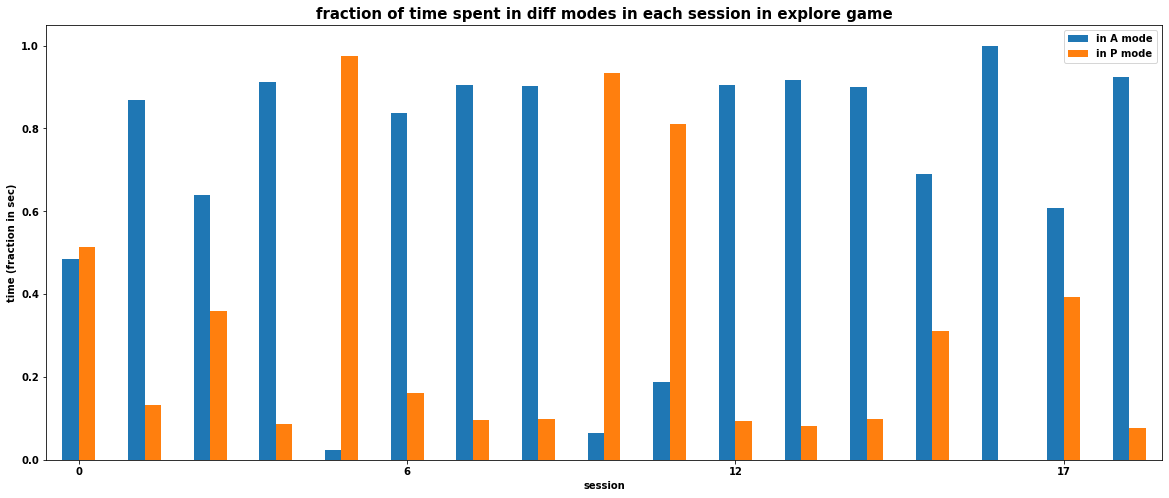

In [101]:
# plt.figure(figsize=(20,8))
# plt.bar(Kx_parameters['session_nr'],Kx_parameters['in A mode'],Kx_parameters['in P mode'])
Kx_parameters.drop(columns=['game_nr','Kx_Atime','Kx_Ptime','total_time','kx_mean','kx_std','Kx_range','Kx_r_q3','repeatn']).plot.bar(figsize=(20,8))
plt.xlabel('session')
plt.xticks(rotation=0)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.ylabel('time (fraction in sec)');
plt.title('fraction of time spent in diff modes in each session in explore game',fontsize=15);

plt.savefig(main_results_path + '\\fraction_time_modes.png',bbox_inches = "tight")
plt.show();

##### Plot range of stiffness values

In [104]:
Kx_parameters.reset_index(inplace=True)

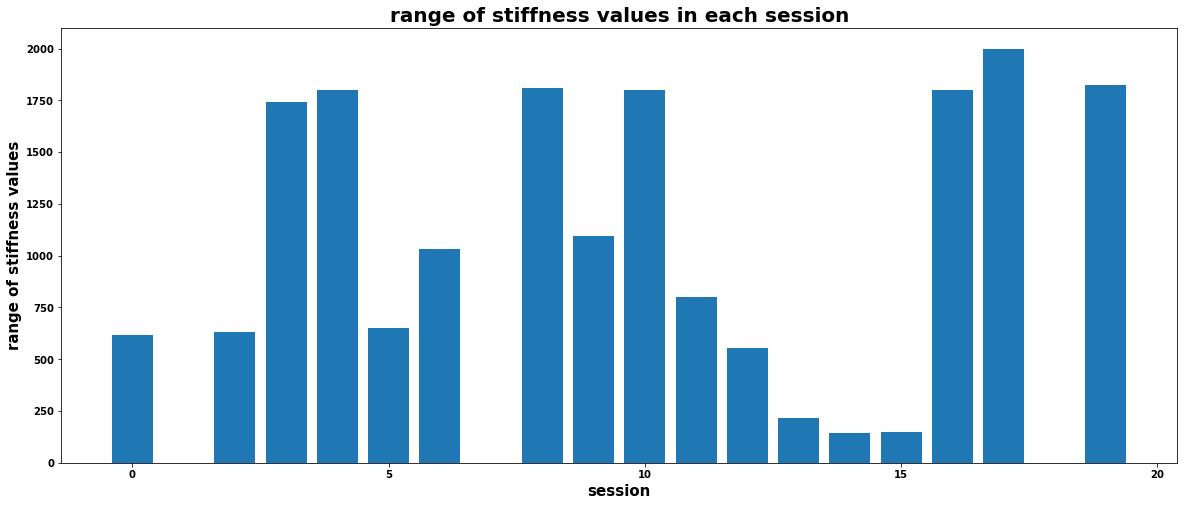

In [105]:
plt.figure(figsize=(20,8))
plt.bar(Kx_parameters['session_nr'],Kx_parameters['Kx_range'])
# Kx_parameters.drop(columns=['game_nr','Kx_Atime','Kx_Ptime','total_time','kx_mean','kx_std','in A mode','in P mode','Kx_r_q3']).plot.bar(figsize=(20,8))
plt.xlabel('session',fontsize=15)
plt.xticks(rotation=0)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.ylabel('range of stiffness values',fontsize=15);
plt.title('range of stiffness values in each session',fontsize=20);

plt.savefig(main_results_path + '\\Kx_range.png',bbox_inches = "tight")
plt.show();

##### Plot mean Kx stiffness coeff
only for explore game

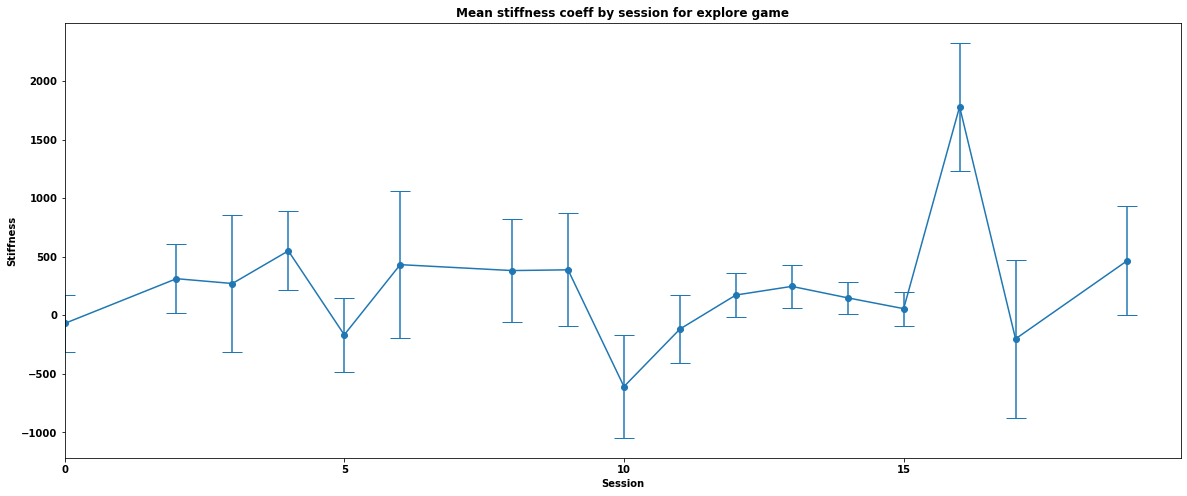

In [109]:
plt.figure(figsize=(20,8))
plt.errorbar(Kx_parameters['session_nr'],Kx_parameters['kx_mean'],Kx_parameters['kx_std'], marker='o', capsize=10)
plt.xlim(left=0);
plt.xlabel('Session')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.ylabel('Stiffness')
plt.title('Mean stiffness coeff by session for explore game')

plt.savefig(main_results_path + '\\Kx_explore.png',bbox_inches = "tight")
plt.show();

##### Plot median of last quadrant of stiffness values

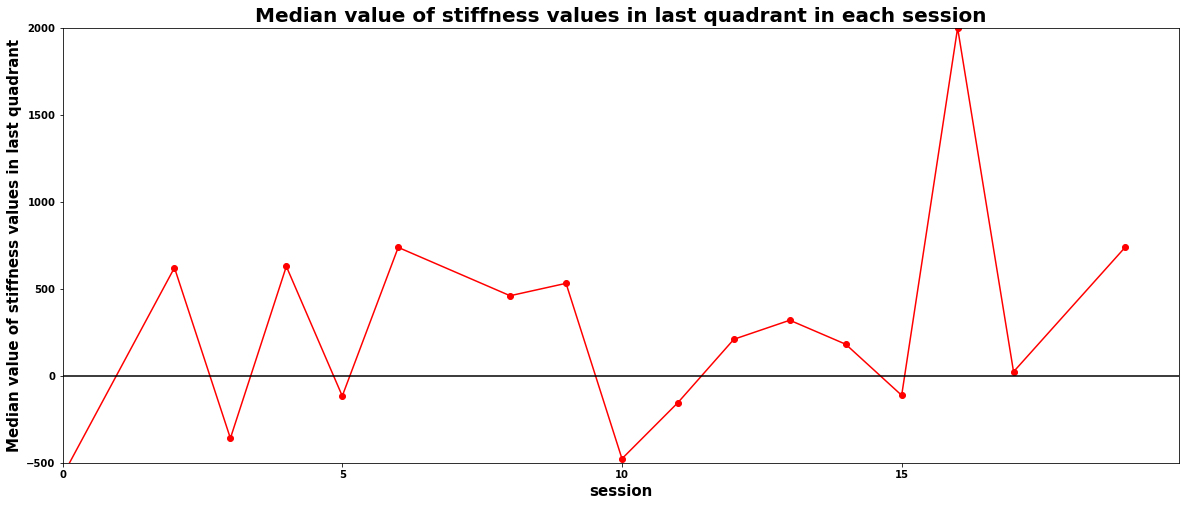

In [111]:
plt.figure(figsize=(20,8))
plt.plot(Kx_parameters['session_nr'],Kx_parameters['Kx_r_q3'],color='red',marker='o')
plt.xlabel('session',fontsize=15)
plt.xticks(rotation=0)
plt.xlim(left=0)
plt.ylim([-500,2000])
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.axhline(y=0, color='black', linestyle='-')
plt.ylabel('Median value of stiffness values in last quadrant',fontsize=15);
plt.title('Median value of stiffness values in last quadrant in each session',fontsize=20);

plt.savefig(main_results_path + '\\Kx_median_lastquad.png',bbox_inches = "tight")
plt.show();

#### Mean/std of Force parameters

##### Plot Force deficit (ratio)

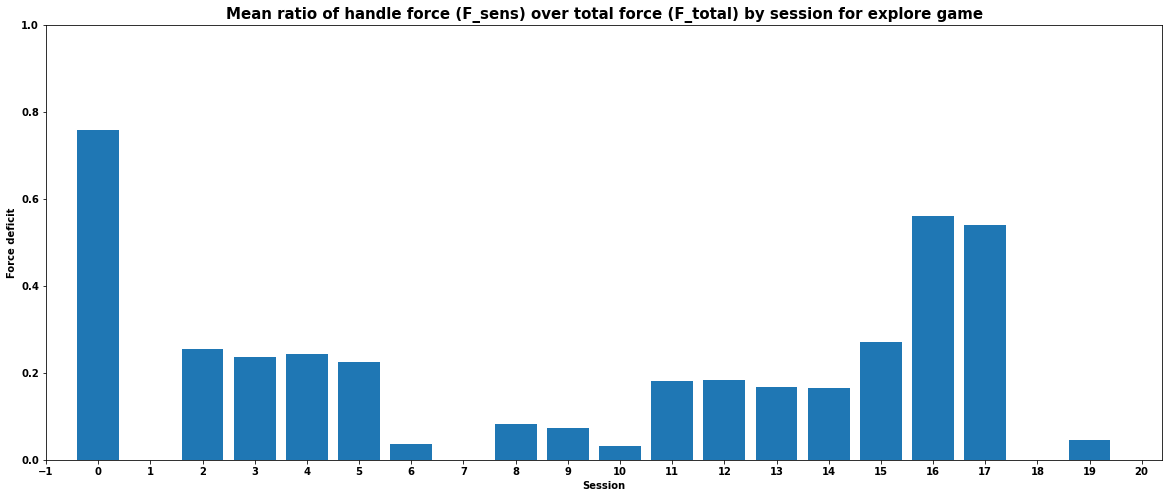

In [114]:
plt.figure(figsize=(20,8))
# plt.errorbar(F_parameters['session_nr'],F_parameters['F_deficit_mean'],F_parameters['F_deficit_std'], marker='o', capsize=10);
plt.bar(F_parameters['session_nr'],F_parameters['F_deficit_mean'])
plt.xlabel('Session')
plt.ylim(top=1)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.xlim(left=-1)
plt.ylabel('Force deficit')

plt.title('Mean ratio of handle force (F_sens) over total force (F_total) by session for explore game',fontsize=15);

plt.savefig(main_results_path + '\\force_deficit_explore.png',bbox_inches = "tight")
plt.show();

##### Plot percentage of time where F_total>maximum force (21N)

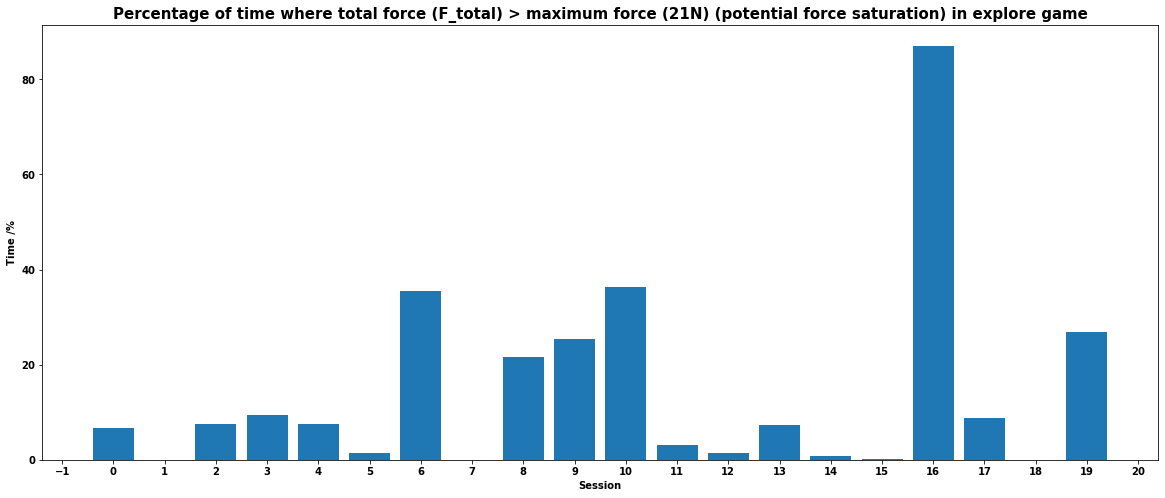

In [115]:
plt.figure(figsize=(20,8))
plt.bar(F_parameters['session_nr'],F_parameters['Ftot_21']);
plt.xlabel('Session')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.ylabel('Time /%')

plt.title('Percentage of time where total force (F_total) > maximum force (21N) (potential force saturation) in explore game',fontsize=15);

plt.savefig(main_results_path + '\\forcetotal_larger21.png', bbox_inches = "tight")
plt.show();

##### Plot percentage of time where F_sens>maximum force (21N)

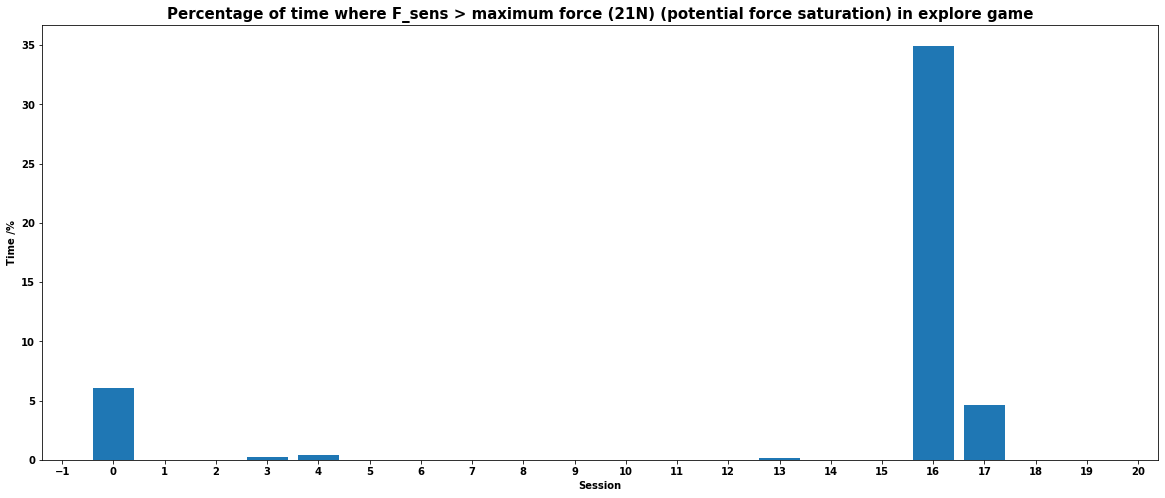

In [116]:
plt.figure(figsize=(20,8))
plt.bar(F_parameters['session_nr'],F_parameters['Fsens_21']);
plt.xlabel('Session')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.ylabel('Time /%')

plt.title('Percentage of time where F_sens > maximum force (21N) (potential force saturation) in explore game',fontsize=15);

plt.savefig(main_results_path + '\\forcesens_larger21.png', bbox_inches = "tight")
plt.show();

##### Plot percentage of time where F_spring>maximum force (21N)

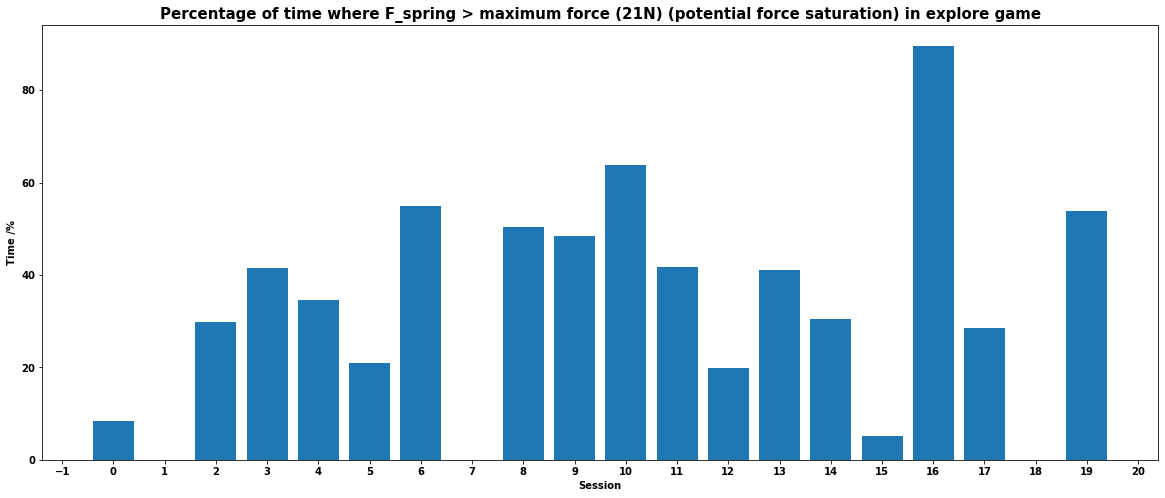

In [117]:
plt.figure(figsize=(20,8))
plt.bar(F_parameters['session_nr'],F_parameters['Fspring_21']);
plt.xlabel('Session')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.ylabel('Time /%')

plt.title('Percentage of time where F_spring > maximum force (21N) (potential force saturation) in explore game',fontsize=15);

plt.savefig(main_results_path + '\\forcespring_larger21.png', bbox_inches = "tight")
plt.show();

##### Nr of help modes

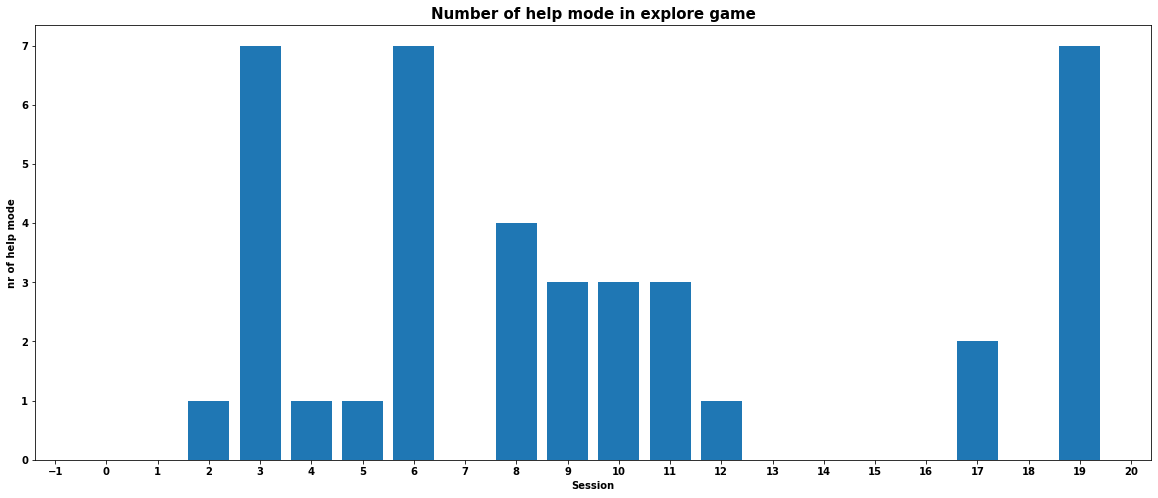

In [118]:
plt.figure(figsize=(20,8))
plt.bar(F_parameters['session_nr'],F_parameters['help_mode']);
plt.xlabel('Session')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.ylabel('nr of help mode')

plt.title('Number of help mode in explore game',fontsize=15);

plt.savefig(main_results_path + '\\help_mode_nr.png', bbox_inches = "tight")
plt.show();

#### merge dfs related to explore game

In [119]:
# combined df only of explore game
# as parameters calculated are of explore game
# gen_explore
# Kx_parameters
# F_parameters
df_combined = reduce(lambda x,y: pd.merge(x,y, on='session_nr', how='outer'), [gen_explore, Kx_parameters, F_parameters])
df_combined.drop(columns=['game_nr_x','game_nr_y'],inplace=True)

In [128]:
# df_combined.info()

##### Correlation between number of help modes and SPARC

In [121]:
df_corr_helpmode = df_combined.groupby(['help_mode']).mean().reset_index()
df_corr_helpmode

,help_mode,session_nr,sparc_mean,sparc_std,Ftot_mean,Ftot_std,vel_mean,veldb_mean,veldb_std,vel_diff,...,game_nr,F_deficit_mean,F_deficit_std,F_sens_mean,F_sens_std,Ftot_21,Fsens_21,Fspring_21,haptics_rho,haptics_pvalue
0,0,11.600000,-2.066444,0.694907,12.945228,16.577369,0.031826,0.041867,0.060608,0.004779,...,0.0,0.384110,0.907289,5.073767,4.247285,20.400151,8.224046,34.956556,0.196571,1.463406e-149
1,1,5.750000,-3.789376,2.236054,5.626701,6.650146,0.039008,0.043820,0.054281,0.008138,...,0.0,0.226223,0.519898,1.249527,2.221570,4.492388,0.108363,26.274323,0.122857,0.000000e+00
2,2,17.000000,-1.940816,0.513467,7.746511,11.726040,0.030731,0.049415,0.070088,0.011719,...,0.0,0.540618,2.066257,4.013002,7.458228,8.859819,4.596860,28.509680,-0.524326,0.000000e+00
3,3,10.000000,-2.460343,1.436740,22.597185,33.437170,0.033553,0.040252,0.050526,0.002244,...,0.0,0.095300,0.312803,0.511833,0.709717,21.647378,0.000000,51.298095,-0.026911,1.327343e-41
4,4,8.000000,-2.578997,1.555632,21.118884,38.747028,0.039346,0.044611,0.055332,-0.000117,...,0.0,0.081704,0.308530,0.185981,0.082591,21.709831,0.000000,50.405469,0.354387,0.000000e+00
5,7,9.333333,-2.812888,2.017026,22.095013,27.192867,0.034042,0.038078,0.053611,0.003577,...,0.0,0.106226,0.259153,1.083004,1.192930,23.972349,0.067192,50.113038,0.167057,2.721188e-23


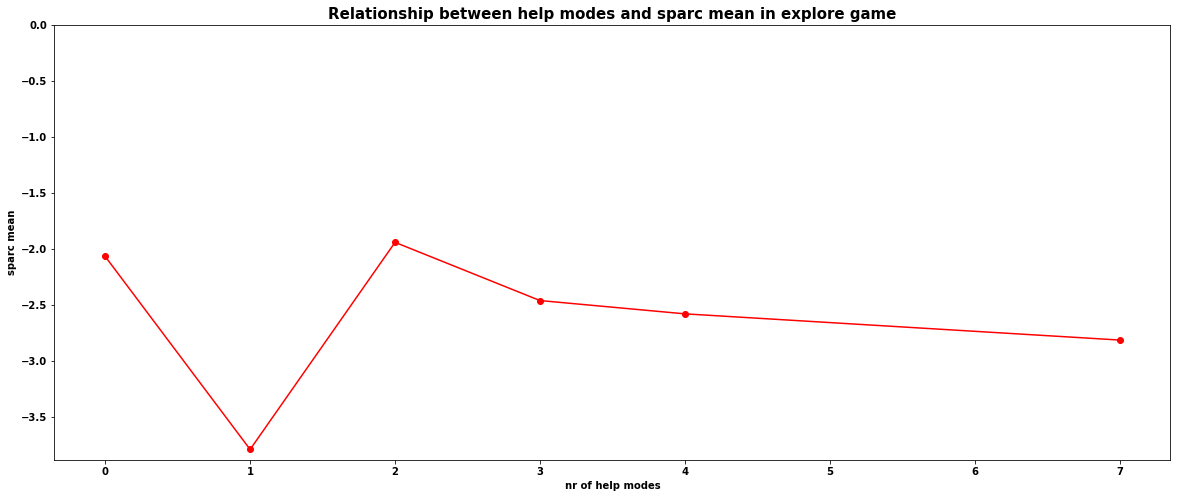

In [122]:
plt.figure(figsize=(20,8))
plt.plot(df_corr_helpmode['help_mode'],df_corr_helpmode['sparc_mean'],color='red',marker='o')
plt.xlabel('nr of help modes')
plt.xticks(rotation=0)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.ylabel('sparc mean');
plt.ylim(top=0)
plt.title('Relationship between help modes and sparc mean in explore game',fontsize=15);

plt.savefig(main_results_path + '\\helpmode_sparc.png',bbox_inches = "tight")
plt.show();

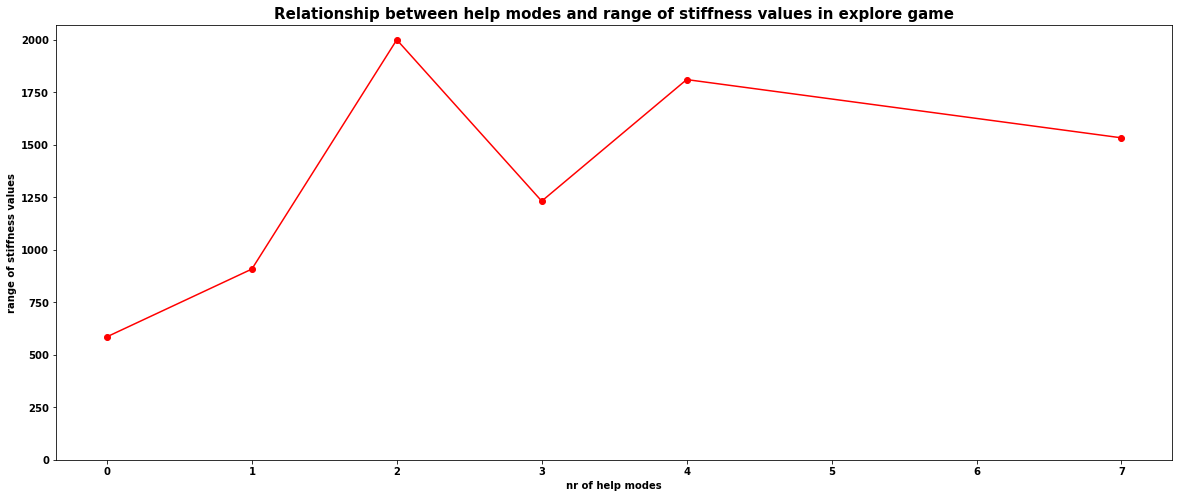

In [123]:
plt.figure(figsize=(20,8))
plt.plot(df_corr_helpmode['help_mode'],df_corr_helpmode['Kx_range'],color='red',marker='o')
plt.xlabel('nr of help modes')
plt.xticks(rotation=0)

plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.ylabel('range of stiffness values');
plt.ylim(bottom=0)
plt.title('Relationship between help modes and range of stiffness values in explore game',fontsize=15);

plt.savefig(main_results_path + '\\helpmode_stiffness.png',bbox_inches = "tight")
plt.show();

##### Correlation between F_sens and KxGain

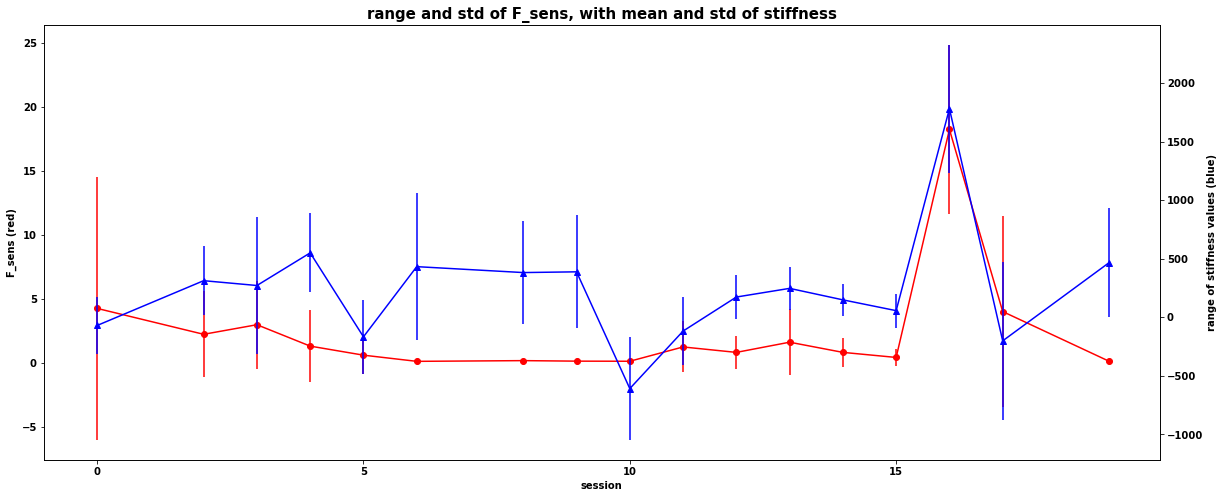

In [124]:
fig,ax=plt.subplots(figsize=(20,8))
ax.errorbar(df_combined['session_nr'],df_combined['F_sens_mean'],df_combined['F_sens_std'],color='red', marker='o')
ax.set_xlabel('session')
plt.xlim(left=-1)
ax.set_ylabel('F_sens (red)')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))

ax2=ax.twinx()
# Kx_mean (inc neg values) in session
ax2.errorbar(df_combined['session_nr'],df_combined['kx_mean'],df_combined['kx_std'],color='blue',marker='^')
ax2.set_ylabel('range of stiffness values (blue)')
plt.title('range and std of F_sens, with mean and std of stiffness',fontsize=15);
plt.show();

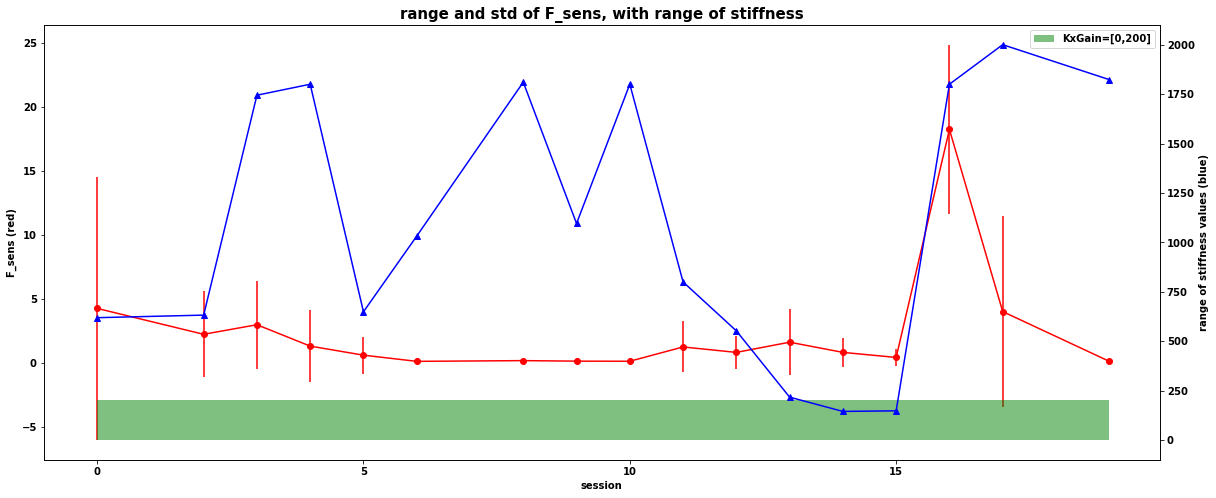

In [125]:
fig,ax=plt.subplots(figsize=(20,8))
ax.errorbar(df_combined['session_nr'],df_combined['F_sens_mean'],df_combined['F_sens_std'],color='red',marker='o')
ax.set_xlabel('session')
plt.xlim(left=-1)
ax.set_ylabel('F_sens (red)')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))

ax2=ax.twinx()
# Kx_range (pos values, max-min) in session
ax2.plot(df_combined['session_nr'],df_combined['Kx_range'],color='blue',marker='^')
ax2.set_ylabel('range of stiffness values (blue)')

ax2.fill_between(df_combined['session_nr'], 0, 200, facecolor='green',alpha=0.5,label='KxGain=[0,200]')
plt.legend()
plt.title('range and std of F_sens, with range of stiffness',fontsize=15);
plt.show();


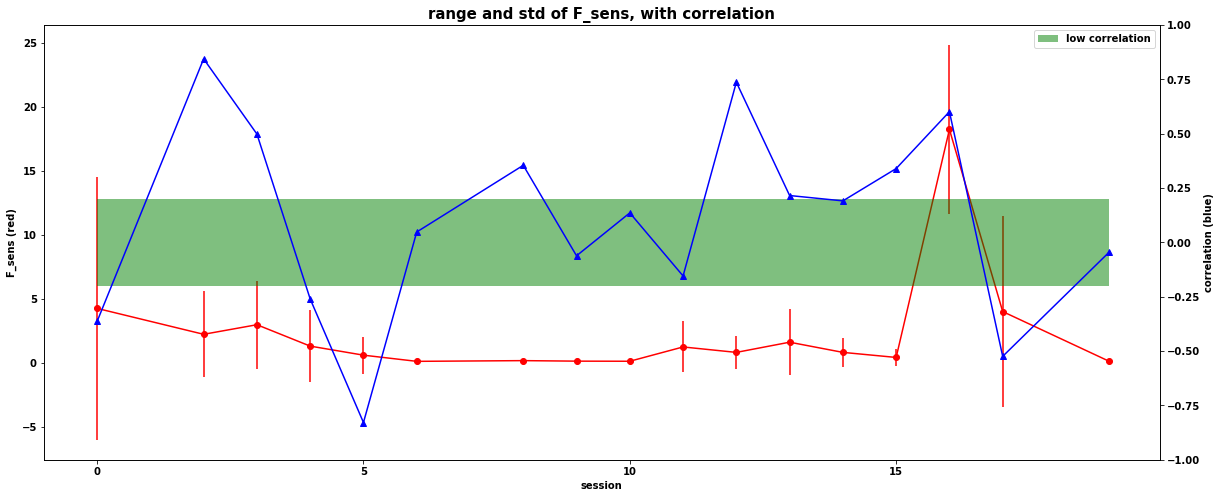

In [126]:
fig,ax=plt.subplots(figsize=(20,8))
ax.errorbar(df_combined['session_nr'],df_combined['F_sens_mean'],df_combined['F_sens_std'],color='red',marker='o')
ax.set_xlabel('session')
plt.xlim(left=-1)
ax.set_ylabel('F_sens (red)')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))

ax2=ax.twinx()
ax2.plot(df_combined['session_nr'],df_combined['haptics_rho'],color='blue',marker='^')
ax2.set_ylabel('correlation (blue)')
ax2.set_ylim(-1,1)

ax2.fill_between(df_combined['session_nr'], -0.2, 0.2, facecolor='green',alpha=0.5,label='low correlation')
plt.legend()
plt.title('range and std of F_sens, with correlation',fontsize=15);
plt.show();

In [127]:
print(f'total run time = {datetime.now()-start_codes}')

total run time = 0:04:34.506340
